# Dependecy

In [ ]:
!pip install seaborn --upgrade
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from numpy import mean, std

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score, mean_absolute_error, mean_squared_error, r2_score, silhouette_score

from imblearn.over_sampling import SVMSMOTE

from google.colab import drive
import os

import matplotlib
matplotlib.__version__

'3.6.2'

# Data Reading

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/DUAR/KASDD'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/DUAR/KASDD/01_HabitabilityAnalysis.csv
/content/drive/MyDrive/DUAR/KASDD/Tugas Akhir.ipynb
/content/drive/MyDrive/DUAR/KASDD/marvel_maap jelek
/content/drive/MyDrive/DUAR/KASDD/Copy of HAB_DUAR.gslides
/content/drive/MyDrive/DUAR/KASDD/Gitan.ipynb


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DUAR/KASDD/01_HabitabilityAnalysis.csv')
df_ordinal = df.copy(deep=True)

In [ ]:
df.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_category
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,High
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,High
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,High
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,Low
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,High


In [ ]:
df.drop('Property_ID', axis=1, inplace=True)

# EDA

* **Property_ID**: ID unik dari property
* **Property_Type**: Jenis dari properti  Apartment, Bungalow, etc) 
* **Property_Area**: Area properti dalam feet persegi
* **Number_of_Windows**: Jumlah Jendela
* **Number_of_Doors**: Jumlah Pintu
* **Furnishing**: Jenis dari Furnish ( Fully Furnished, Semi Furnished, atau Unfurnished )
* **Frequency_of_Powercuts**: Rata-rata mati lampu dalam seminggu
* **Power_Backup**: Kemampuan untuk menyediakan listrik backup
* **Water_Supply**: Kesediaan air  ( All time, Once in a day - Morning, Once in a day - Evening, and Once in two days) 
* **Traffic_Density_Score**: Tingkat kepadatan lalu lintas/kemacetan
* **Crime_Rate**: Tingkat kejahatan di daerah properti ( Well below average, Slightly below average, Slightly above average, and  Well above average )
* **Dust_and_Noise**: Tingkat debu dan suara ( High, Medium, Low )
* **Air_Quality_Index**: Tingkat kualitas udara
* **Neighborhood_Review**: Penilaian daerah oleh masyarakat
* **Habitability_category**: Kategori kelayakhunian suatu properti

## Data Introduction

In [ ]:
df.describe()

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review
count,39499.000000,37845.000000,39499.000000,38116.000000,39499.000000,39499.000000,39499.000000
mean,1391.715638,3.923768,2.331375,0.484678,6.354772,121.352566,3.735945
std,1953.287544,2.690992,1.179964,0.752207,1.219681,62.384669,0.796843
min,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,494.000000,2.000000,1.000000,0.000000,5.600000,95.000000,3.220000
50%,932.000000,4.000000,2.000000,0.000000,6.470000,113.000000,3.850000
75%,1770.000000,5.000000,3.000000,1.000000,7.220000,140.000000,4.260000
max,28064.000000,15.000000,6.000000,3.000000,9.910000,1044.000000,5.000000


array([[<AxesSubplot: title={'center': 'Property_Area'}>,
        <AxesSubplot: title={'center': 'Number_of_Windows'}>,
        <AxesSubplot: title={'center': 'Number_of_Doors'}>],
       [<AxesSubplot: title={'center': 'Frequency_of_Powercuts'}>,
        <AxesSubplot: title={'center': 'Traffic_Density_Score'}>,
        <AxesSubplot: title={'center': 'Air_Quality_Index'}>],
       [<AxesSubplot: title={'center': 'Neighborhood_Review'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

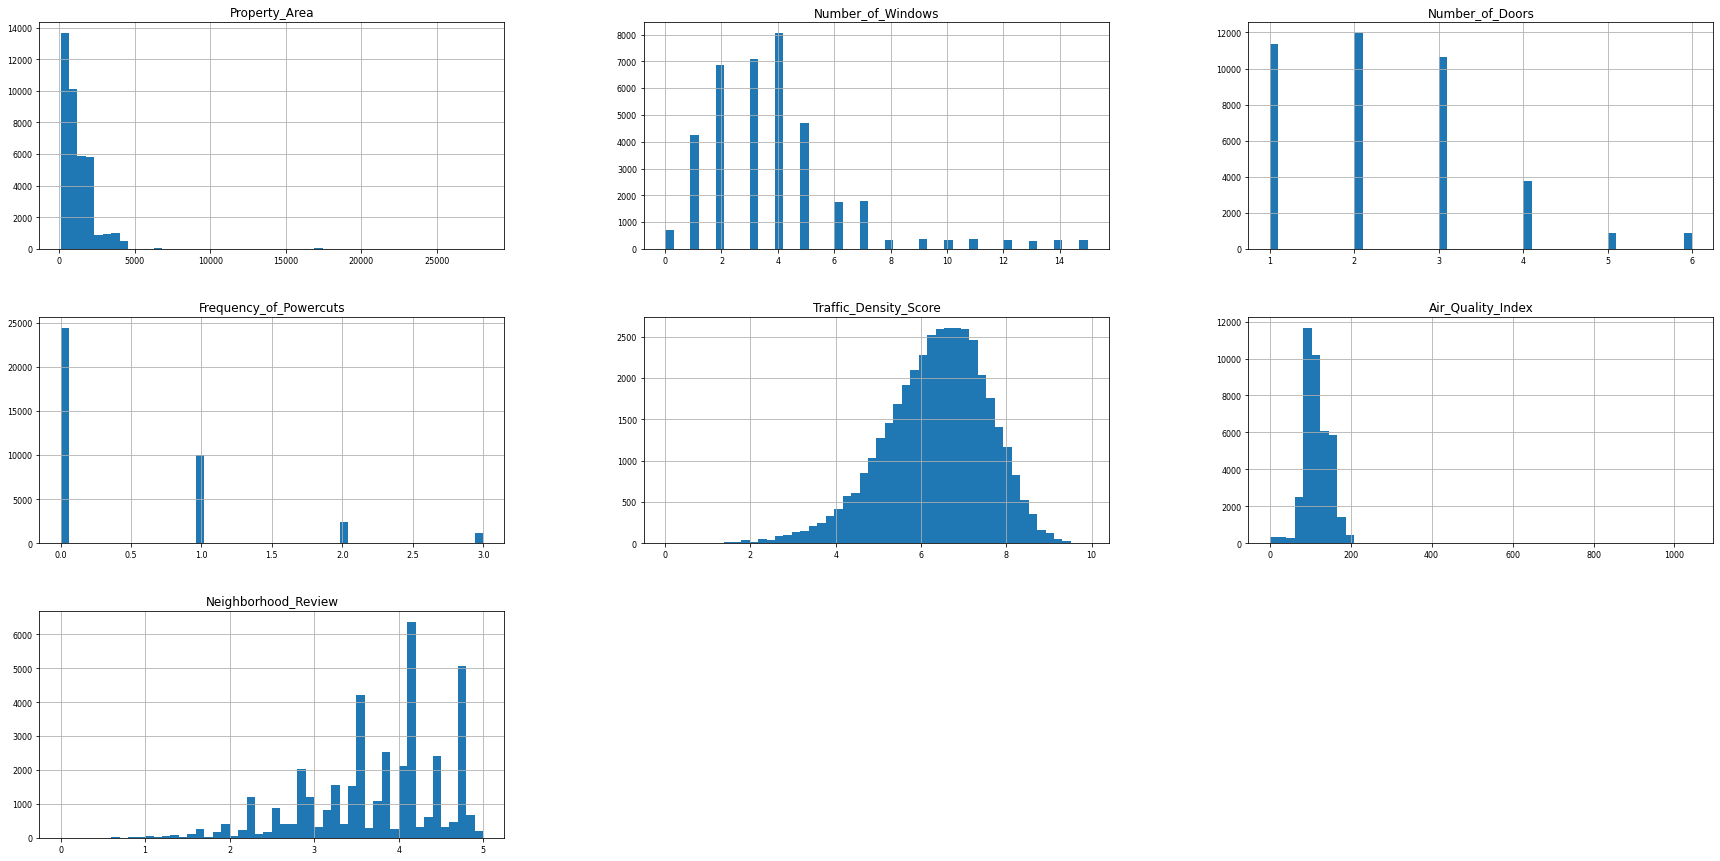

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(30, 15), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_Type           39499 non-null  object 
 1   Property_Area           39499 non-null  int64  
 2   Number_of_Windows       37845 non-null  float64
 3   Number_of_Doors         39499 non-null  int64  
 4   Furnishing              38457 non-null  object 
 5   Frequency_of_Powercuts  38116 non-null  float64
 6   Power_Backup            39499 non-null  object 
 7   Water_Supply            39499 non-null  object 
 8   Traffic_Density_Score   39499 non-null  float64
 9   Crime_Rate              38712 non-null  object 
 10  Dust_and_Noise          38280 non-null  object 
 11  Air_Quality_Index       39499 non-null  float64
 12  Neighborhood_Review     39499 non-null  float64
 13  Habitability_category   39499 non-null  object 
dtypes: float64(5), int64(2), object(7)
mem

In [ ]:
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts())
  print("------------------------------------")

Apartment             14596
Single-family home    11477
Duplex                 5806
Bungalow               4238
Container Home         2872
#R%$G&867               510
Name: Property_Type, dtype: int64
------------------------------------
Semi_Furnished     20357
Unfurnished        10344
Fully Furnished     7756
Name: Furnishing, dtype: int64
------------------------------------
No               29714
Yes               8957
NOT MENTIONED      828
Name: Power_Backup, dtype: int64
------------------------------------
All time                   19511
Once in a day - Morning     9897
Once in a day - Evening     7815
Once in two days            1931
NOT MENTIONED                345
Name: Water_Supply, dtype: int64
------------------------------------
Well below average        19472
Slightly below average    11580
Slightly above average     5303
Well above average         2357
Name: Crime_Rate, dtype: int64
------------------------------------
Medium    32996
High       3212
Low        2072


## Visualization

### 1. Apa rata-rata nilai Neighborhood_Review untuk setiap kategori Crime_Rate?

In [ ]:
df_groupby_crime_rate = df.groupby('Crime_Rate').mean().reset_index()
df_groupby_crime_rate

,Crime_Rate,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review
0,Slightly above average,1326.134075,3.915812,2.334905,0.485770,6.377222,122.863474,2.943809
1,Slightly below average,1392.243264,3.926390,2.352418,0.486863,5.878967,113.884888,3.596393
2,Well above average,1376.329232,3.970432,2.324989,0.476801,6.812499,127.652524,2.320700
3,Well below average,1408.630136,3.925098,2.319844,0.483223,6.575811,124.676048,4.205545


Text(0.5, 1.0, 'Neighborhood Review Mean by Crime Rate')

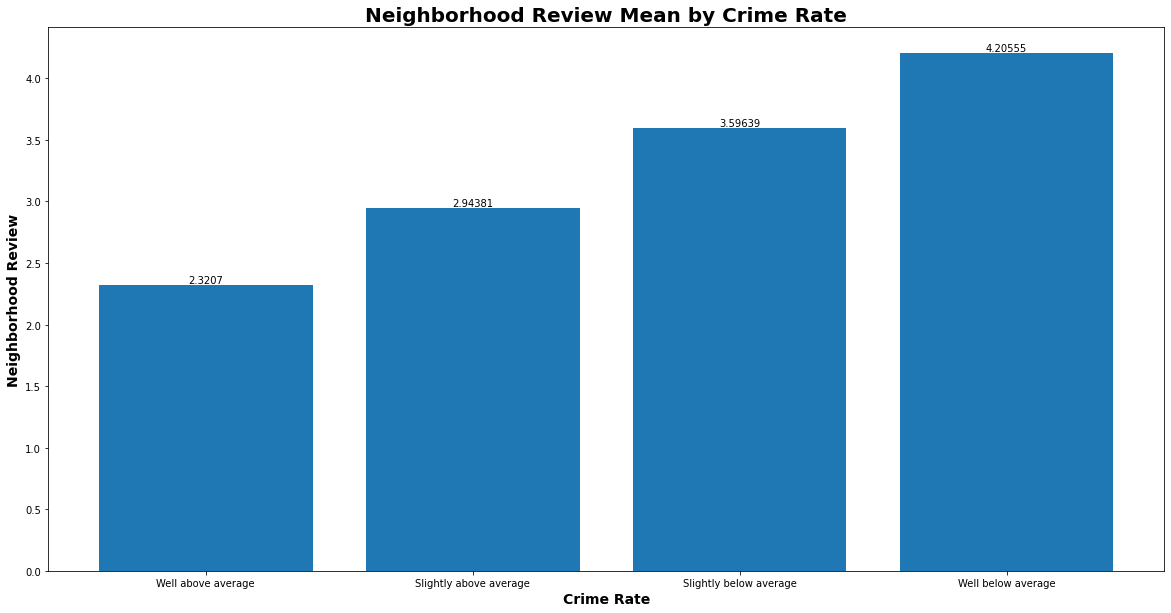

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
bars = ax.bar(df_groupby_crime_rate.sort_values(by='Neighborhood_Review')['Crime_Rate'], df_groupby_crime_rate.sort_values(by='Neighborhood_Review')['Neighborhood_Review'])
ax.bar_label(bars)
plt.xlabel("Crime Rate", fontdict={'size':14, 'weight':'bold'})
plt.ylabel("Neighborhood Review", fontdict={'size':14, 'weight':'bold'})
plt.title('Neighborhood Review Mean by Crime Rate', fontdict={'size':20, 'weight':'bold'})

### 2. Apa ciri-ciri properti yang memiliki Habitability_category bernilai “High”?

In [ ]:
Crime_Rate = {"Well below average" : 0, "Slightly below average" : 1, "Slightly above average" : 2, "Well above average" : 3}
Dust_and_Noise = {"Low" : 0, "Medium" : 1, "High" : 2}

In [ ]:
df_ordinal['Crime_Rate'].replace(Crime_Rate,inplace=True)
df_ordinal['Dust_and_Noise'].replace(Dust_and_Noise,inplace=True)

In [ ]:
df_groupby_habitability_category = df_ordinal.groupby('Habitability_category').mean().reset_index()
df_groupby_habitability_category

,Habitability_category,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
0,High,1452.820294,4.052885,2.377413,0.402071,6.319372,0.562009,1.005436,120.169062,3.941151
1,Low,1044.489483,3.291209,2.140228,1.022313,6.665552,2.007175,1.176871,129.985539,2.435947
2,Middle,1267.530574,3.633012,2.217707,0.633316,6.395435,1.109249,1.076973,123.213455,3.357114


In [ ]:
df_groupby_habitability_category.Habitability_category = pd.Categorical(df_groupby_habitability_category.Habitability_category, 
                      categories=["Low", "Middle", "High"],
                      ordered=True)

In [ ]:
def numeric_visualization_by_habitability_category(column):
  fig, ax = plt.subplots(figsize=(20,10))
  bars = ax.bar(df_groupby_habitability_category.sort_values(by='Habitability_category')['Habitability_category'], df_groupby_habitability_category.sort_values(by='Habitability_category')[column])
  ax.bar_label(bars)
  plt.xlabel("Habitability Category", fontdict={'size':14, 'weight':'bold'})
  plt.ylabel(column.replace("_", " "), fontdict={'size':14, 'weight':'bold'})
  plt.title(f'{column.replace("_", " ")} Mean by Habitability Category', fontdict={'size':20, 'weight':'bold'})

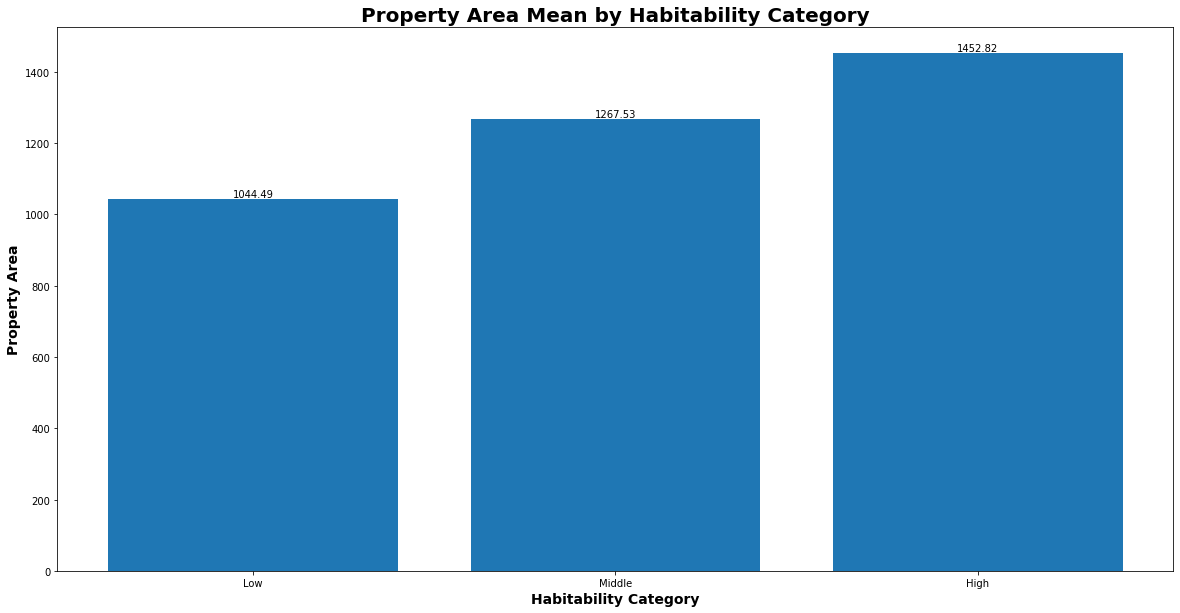

In [ ]:
numeric_visualization_by_habitability_category("Property_Area")

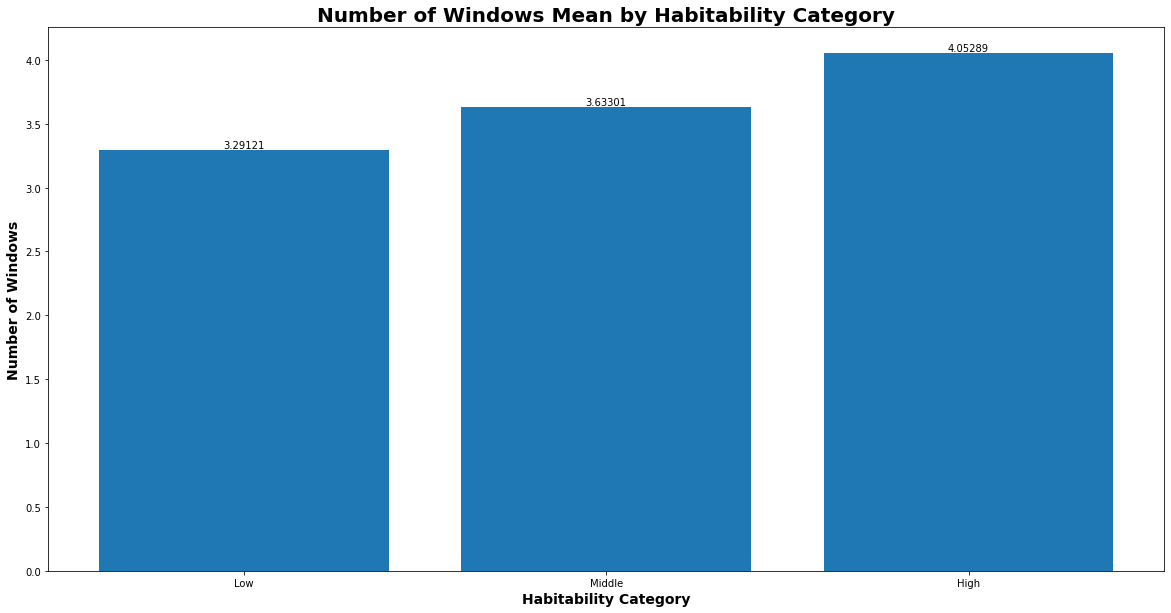

In [ ]:
numeric_visualization_by_habitability_category("Number_of_Windows")

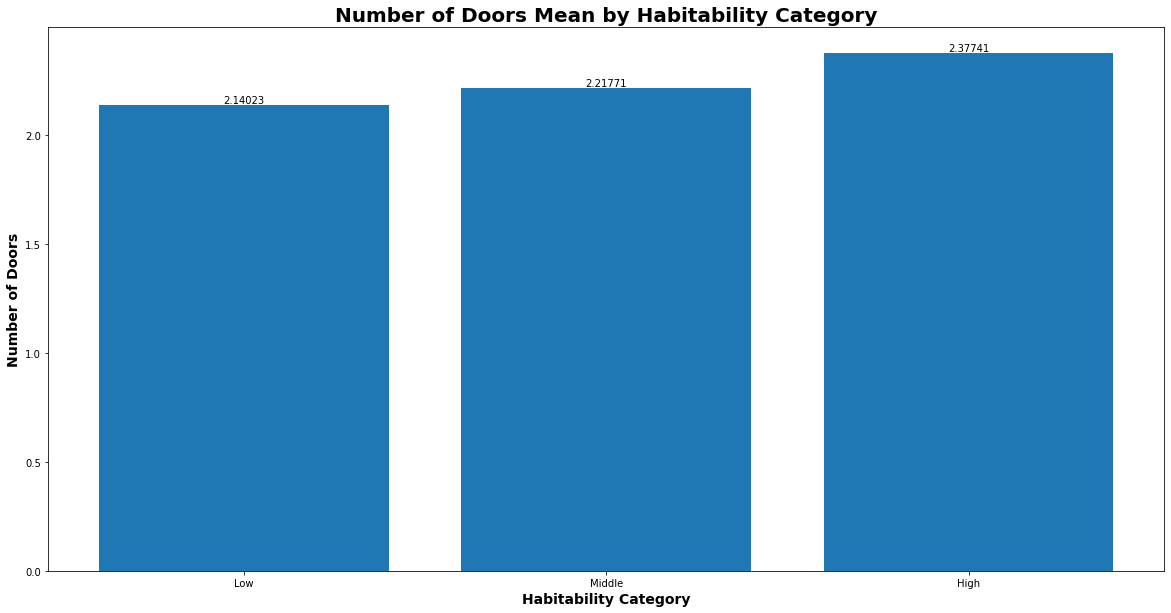

In [ ]:
numeric_visualization_by_habitability_category("Number_of_Doors")

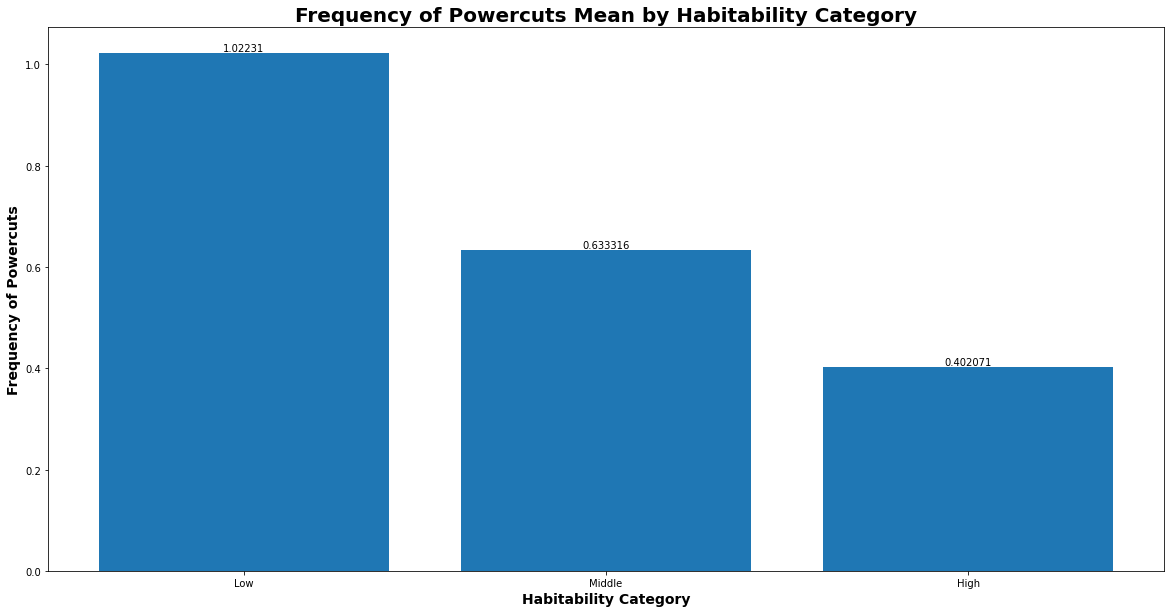

In [ ]:
numeric_visualization_by_habitability_category("Frequency_of_Powercuts")

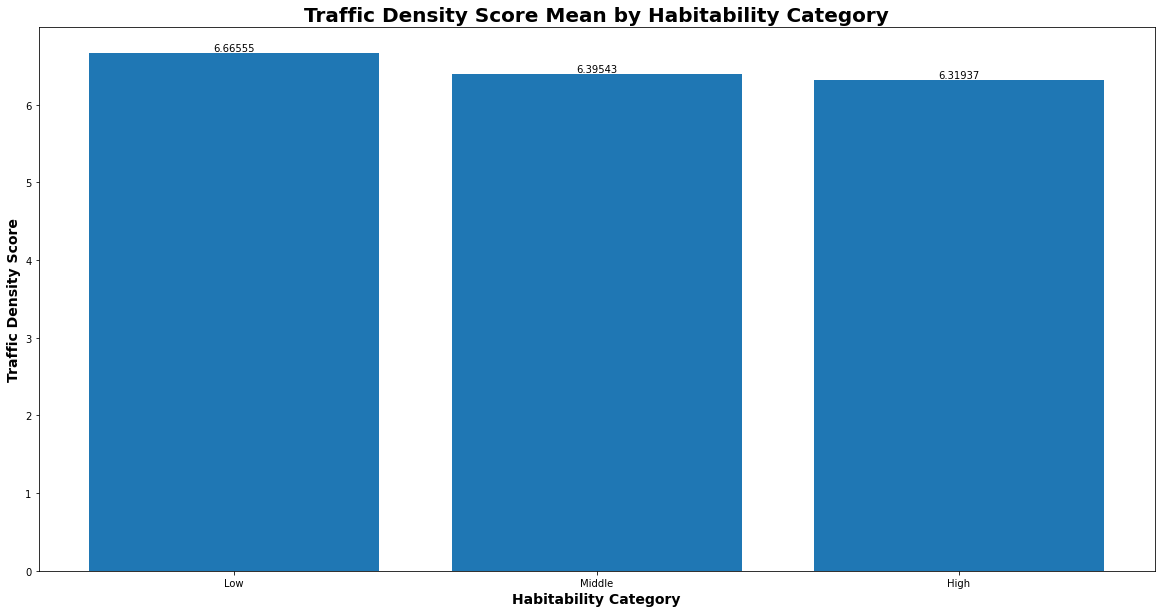

In [ ]:
numeric_visualization_by_habitability_category("Traffic_Density_Score")

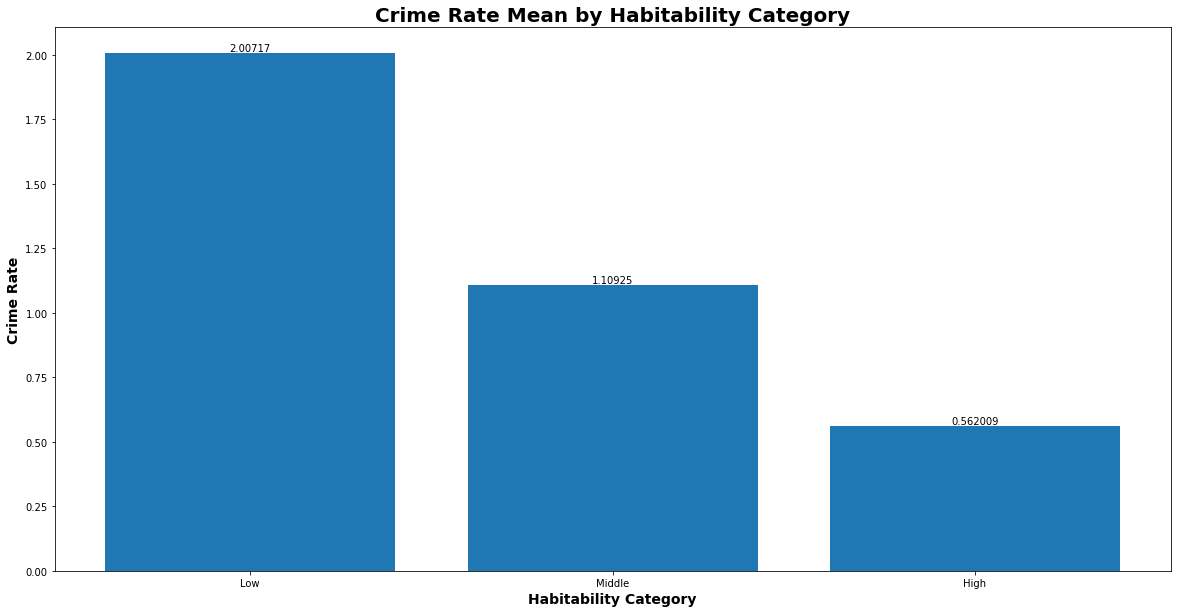

In [ ]:
numeric_visualization_by_habitability_category("Crime_Rate")

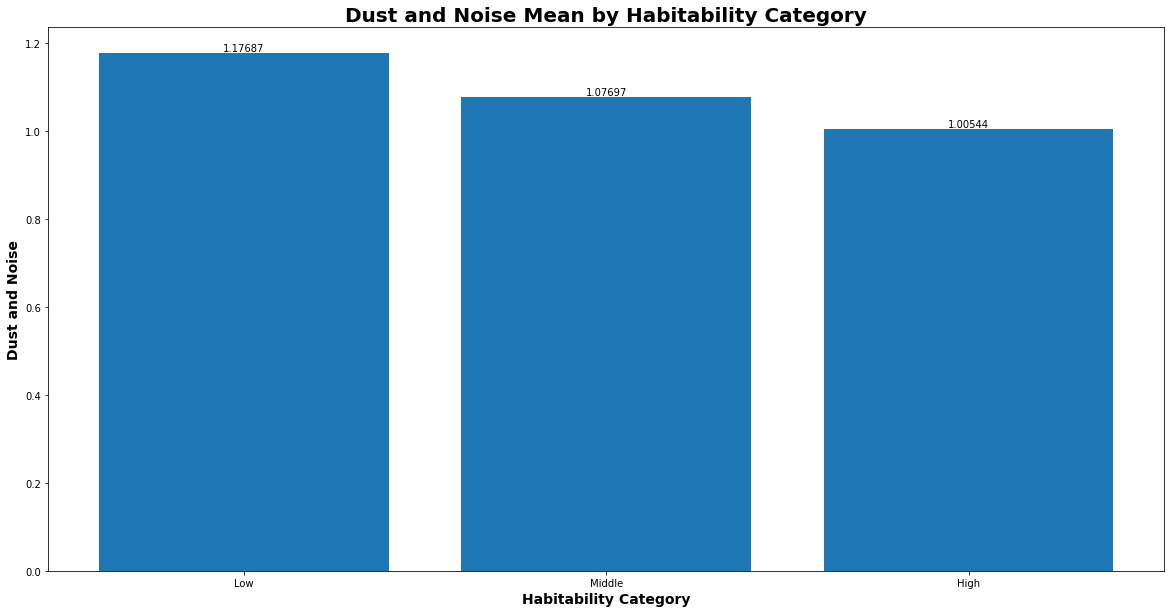

In [ ]:
numeric_visualization_by_habitability_category("Dust_and_Noise")

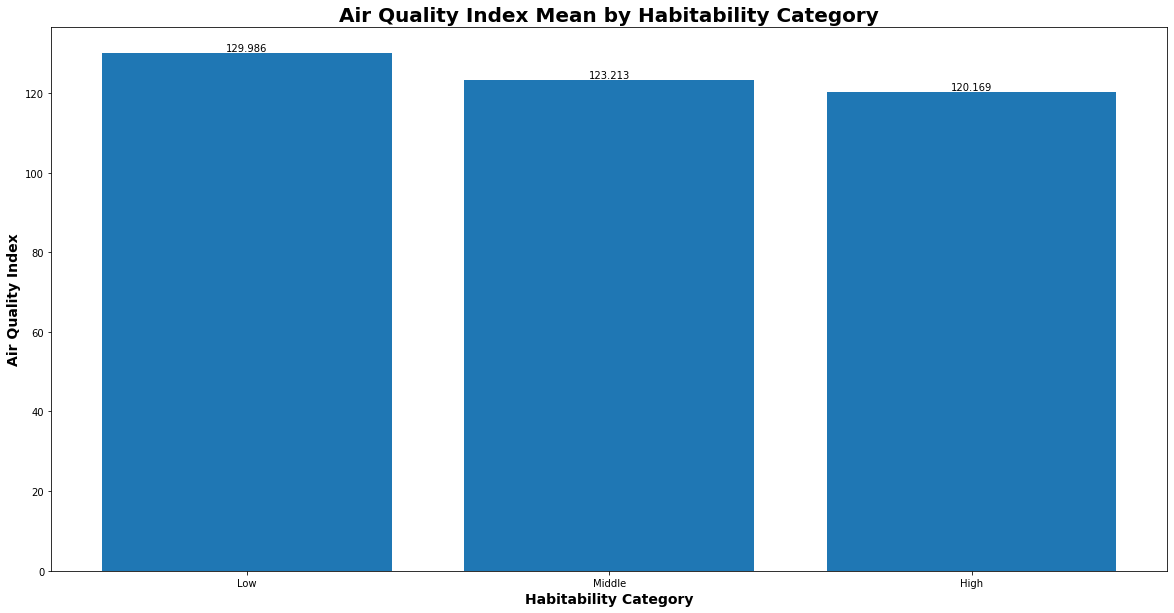

In [ ]:
numeric_visualization_by_habitability_category("Air_Quality_Index")

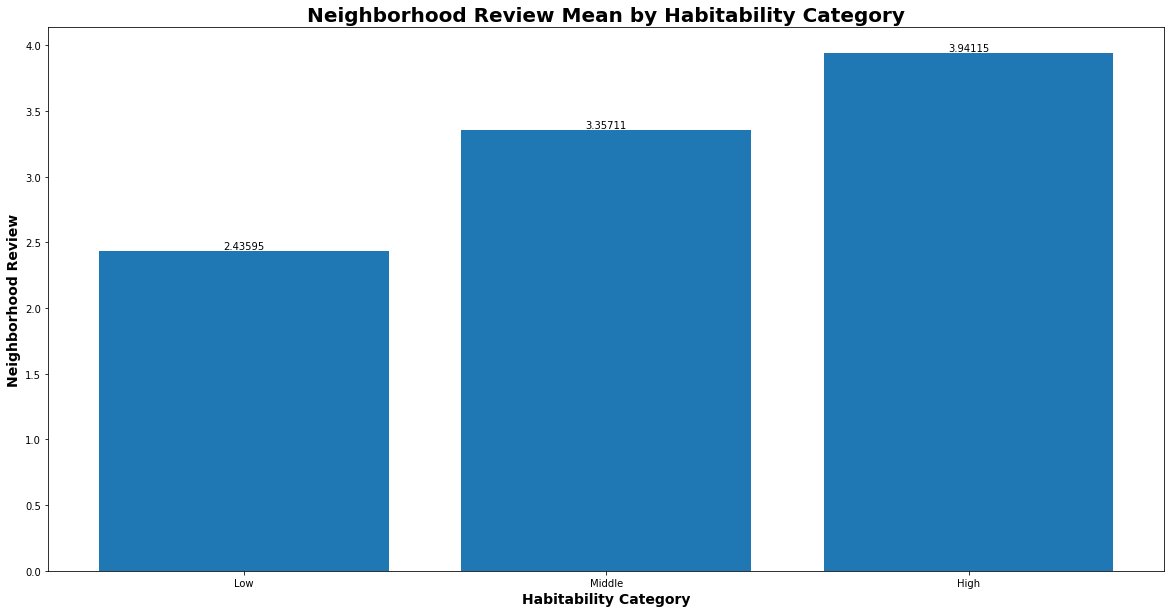

In [ ]:
numeric_visualization_by_habitability_category("Neighborhood_Review")

In [ ]:
df_high_habitability = df_ordinal[df_ordinal['Habitability_category'] == 'High'].select_dtypes(include='object').reset_index(drop=True)
df_high_habitability.head()

,Property_ID,Property_Type,Furnishing,Power_Backup,Water_Supply,Habitability_category
0,0x21e3,Apartment,Semi_Furnished,No,Once in a day - Morning,High
1,0x68d4,Apartment,Unfurnished,No,Once in a day - Evening,High
2,0x7d81,Apartment,Fully Furnished,No,Once in a day - Morning,High
3,0x9409,Bungalow,Fully Furnished,No,All time,High
4,0xbe4e,Single-family home,Unfurnished,No,Once in a day - Morning,High


In [ ]:
df_non_high_habitability = df_ordinal[df_ordinal['Habitability_category'] != 'High'].select_dtypes(include='object').reset_index(drop=True)
df_non_high_habitability.head()

,Property_ID,Property_Type,Furnishing,Power_Backup,Water_Supply,Habitability_category
0,0x7a57,Apartment,Unfurnished,Yes,Once in a day - Morning,Low
1,0x2ea5,Duplex,Semi_Furnished,No,All time,Low
2,0x839f,Single-family home,Semi_Furnished,No,Once in two days,Middle
3,0x7188,Apartment,Unfurnished,No,All time,Low
4,0xbdc,Bungalow,Unfurnished,No,All time,Low


In [ ]:
def categorical_visualization_high_habitability(column):
  data = df_high_habitability[column].value_counts()

  plt.figure(figsize=(20,10))
  plt.pie(data.tolist(), labels = data.index.tolist(), autopct='%.1f%%')
  plt.title(f'{column.replace("_", " ")} Proportion On High Habitability Category', fontdict={'size':16, 'weight':'bold'})
  plt.show()

def categorical_visualization_non_high_habitability(column):
  data = df_non_high_habitability[column].value_counts()

  plt.figure(figsize=(20,10))
  plt.pie(data.tolist(), labels = data.index.tolist(), autopct='%.1f%%')
  plt.title(f'{column.replace("_", " ")} Proportion On Non High Habitability Category', fontdict={'size':16, 'weight':'bold'})
  plt.show()

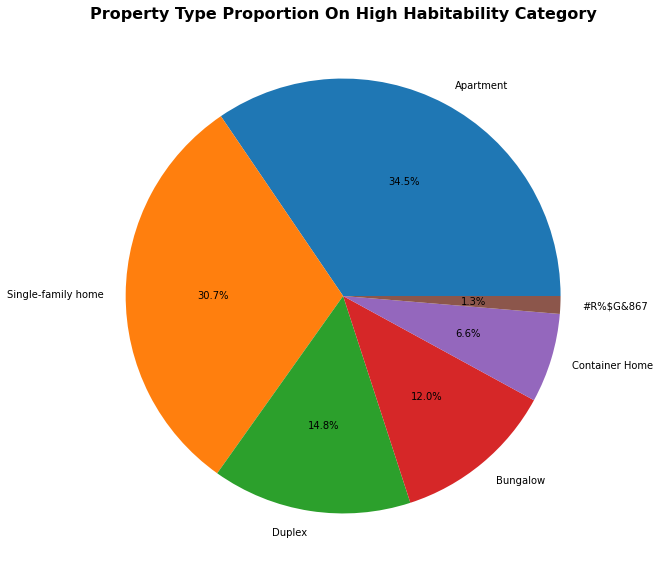

In [ ]:
categorical_visualization_high_habitability("Property_Type")

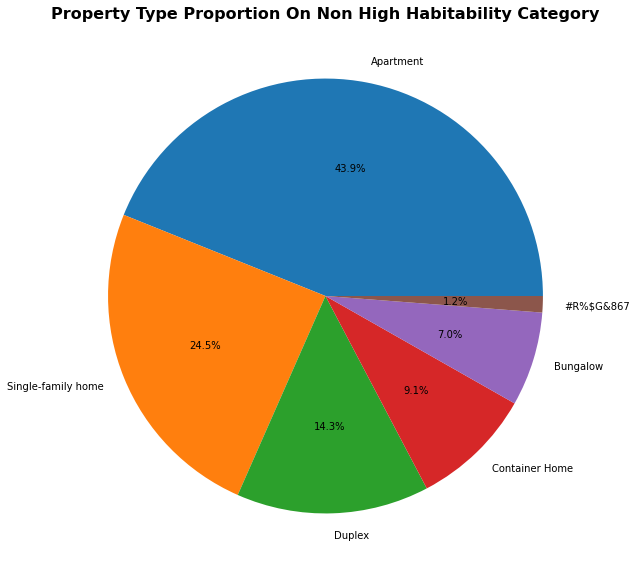

In [ ]:
categorical_visualization_non_high_habitability("Property_Type")

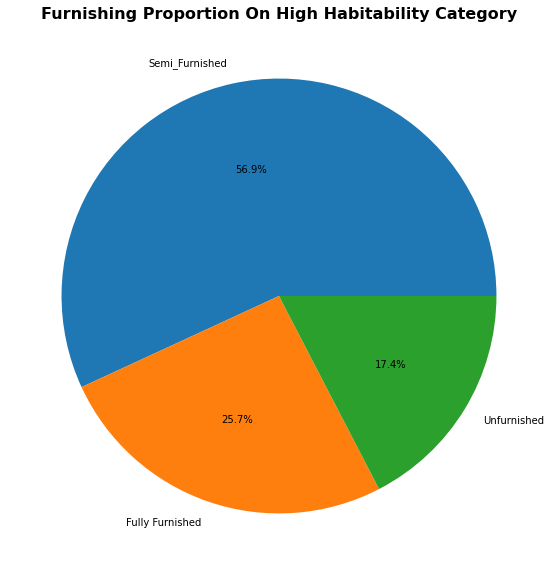

In [ ]:
categorical_visualization_high_habitability("Furnishing")

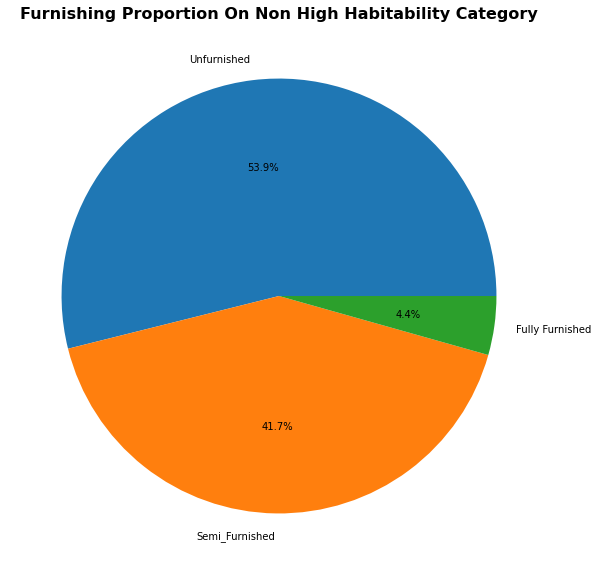

In [ ]:
categorical_visualization_non_high_habitability("Furnishing")

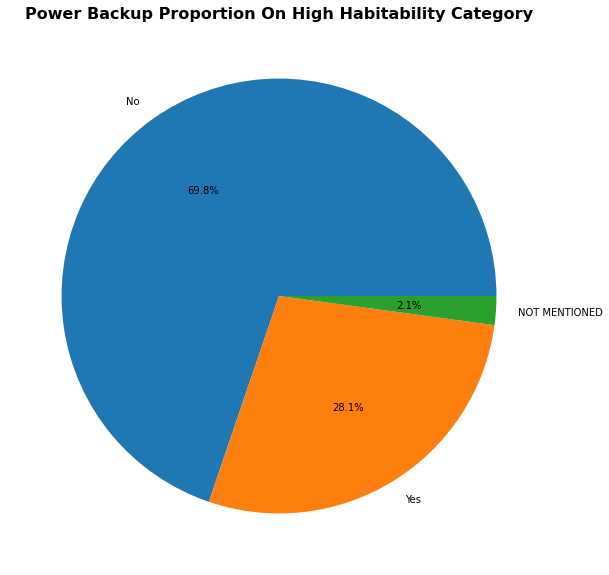

In [ ]:
categorical_visualization_high_habitability("Power_Backup")

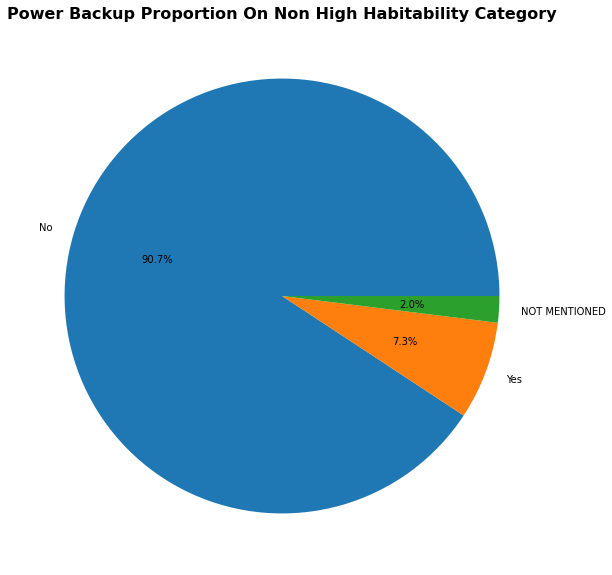

In [ ]:
categorical_visualization_non_high_habitability("Power_Backup")

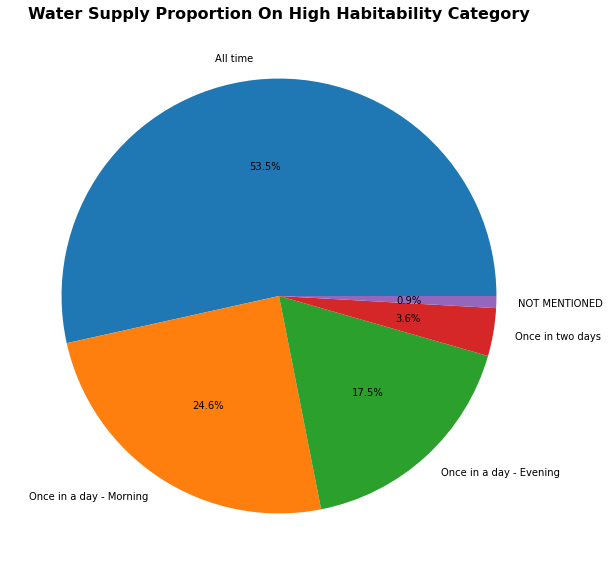

In [ ]:
categorical_visualization_high_habitability("Water_Supply")

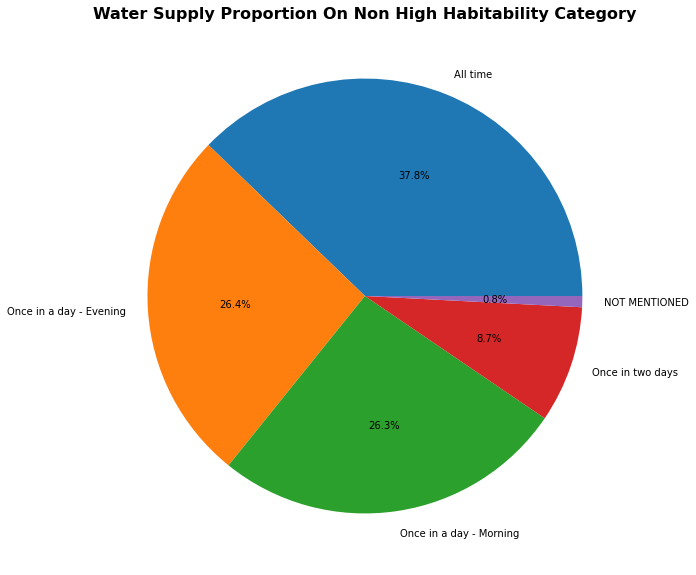

In [ ]:
categorical_visualization_non_high_habitability("Water_Supply")

### 3. Apakah terdapat hubungan antara Traffic_Density_Score dan Crime_Rate?

In [ ]:
df_groupby_crime_rate.Crime_Rate = pd.Categorical(df_groupby_crime_rate.Crime_Rate, 
                      categories=["Well below average","Slightly below average","Slightly above average","Well above average"],
                      ordered=True)

Text(0.5, 1.0, 'Traffic Density Score Mean by Crime Rate')

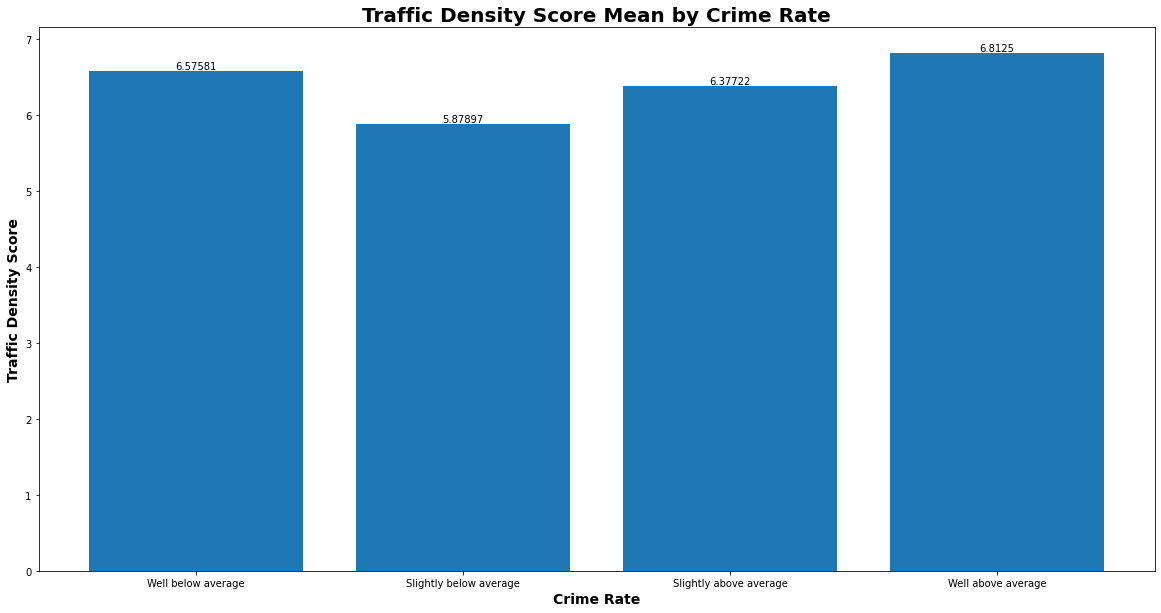

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
bars = ax.bar(df_groupby_crime_rate.sort_values(by='Crime_Rate')['Crime_Rate'], df_groupby_crime_rate.sort_values(by='Crime_Rate')['Traffic_Density_Score'])
ax.bar_label(bars)
plt.xlabel("Crime Rate", fontdict={'size':14, 'weight':'bold'})
plt.ylabel("Traffic Density Score", fontdict={'size':14, 'weight':'bold'})
plt.title('Traffic Density Score Mean by Crime Rate', fontdict={'size':20, 'weight':'bold'})

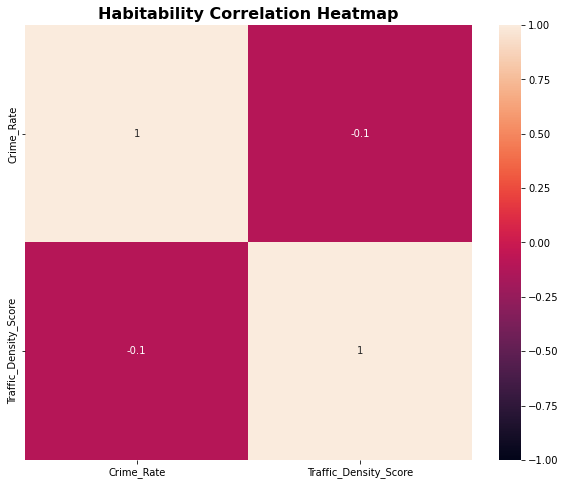

In [ ]:
plt.figure(figsize=(10,8))
heatmap=sns.heatmap(df_ordinal[['Crime_Rate', 'Traffic_Density_Score']].corr(method='kendall'), vmin=-1, vmax=1, annot=True)
plt.title('Habitability Correlation Heatmap', fontdict={'size':16, 'weight':'bold'})
plt.show()

### 4. Apakah bagi rumah yang memiliki Power_Backup, terdapat juga persediaan air yang lancar?

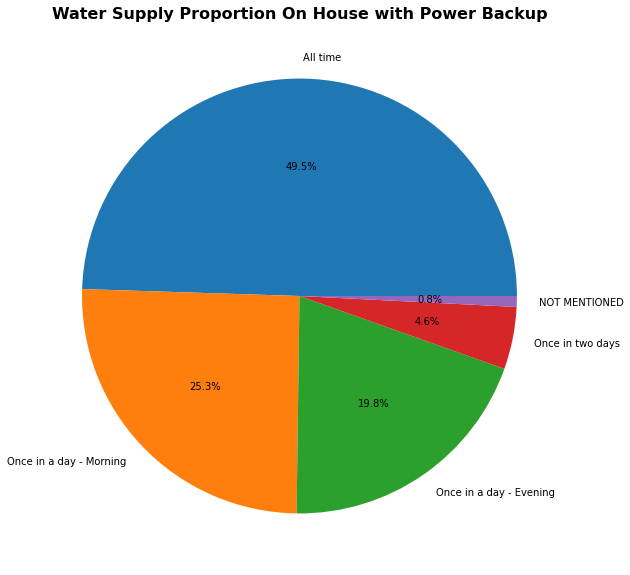

In [ ]:
data = df[df['Power_Backup'] == 'Yes']['Water_Supply'].value_counts()


plt.figure(figsize=(20,10))
plt.pie(data.tolist(), labels = data.index.tolist(), autopct='%.1f%%')
plt.title('Water Supply Proportion On House with Power Backup', fontdict={'size':16, 'weight':'bold'})
plt.show()

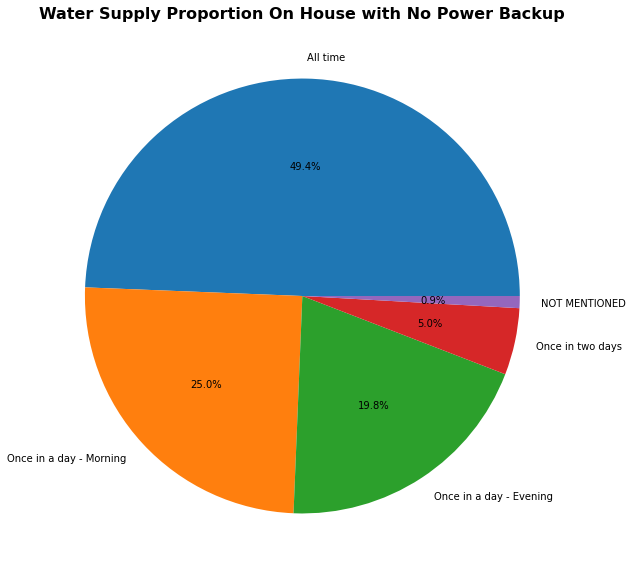

In [ ]:
data = df[df['Power_Backup'] != 'Yes']['Water_Supply'].value_counts()


plt.figure(figsize=(20,10))
plt.pie(data.tolist(), labels = data.index.tolist(), autopct='%.1f%%')
plt.title('Water Supply Proportion On House with No Power Backup', fontdict={'size':16, 'weight':'bold'})
plt.show()

### 5. Apakah terdapat hubungan antara Traffic_Density_Score dan Dust_and_Noise?

In [ ]:
df_groupby_dust_and_noise = df.groupby('Dust_and_Noise').mean().reset_index()
df_groupby_dust_and_noise

,Dust_and_Noise,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review
0,High,1413.282067,3.970760,2.353674,0.491454,7.990131,156.372976,3.467671
1,Low,1374.225386,3.991972,2.316120,0.495976,4.187148,74.129826,3.844537
2,Medium,1391.813008,3.915264,2.331040,0.482386,6.331748,120.861862,3.755466


In [ ]:
df_groupby_dust_and_noise.Dust_and_Noise = pd.Categorical(df_groupby_dust_and_noise.Dust_and_Noise, 
                      categories=["Low", "Medium", "High"],
                      ordered=True)

Text(0.5, 1.0, 'Traffic Density Score Mean by Dust And Noise Level')

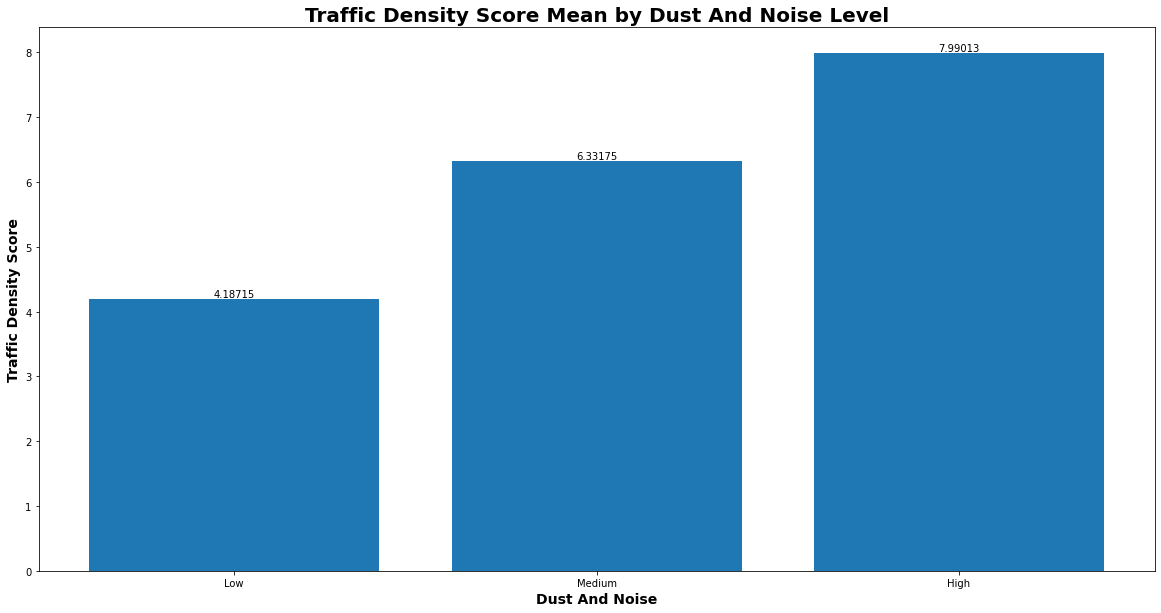

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
bars = ax.bar(df_groupby_dust_and_noise.sort_values(by='Dust_and_Noise')['Dust_and_Noise'], df_groupby_dust_and_noise.sort_values(by='Dust_and_Noise')['Traffic_Density_Score'])
ax.bar_label(bars)
plt.xlabel("Dust And Noise", fontdict={'size':14, 'weight':'bold'})
plt.ylabel("Traffic Density Score", fontdict={'size':14, 'weight':'bold'})
plt.title('Traffic Density Score Mean by Dust And Noise Level', fontdict={'size':20, 'weight':'bold'})

### 6. Apakah tipe properti dengan rata-rata luas area tertinggi?

In [ ]:
df_groupby_property_type = df.groupby('Property_Type').mean().reset_index()
df_groupby_property_type

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review
0,#R%$G&867,1402.043137,3.734694,2.276471,0.469636,6.412255,120.952941,3.744922
1,Apartment,744.753152,2.503473,1.996026,0.487789,6.354620,121.510071,3.726017
2,Bungalow,3229.712836,9.368718,4.046720,0.483374,6.341288,121.844030,3.747881
3,Container Home,548.941156,1.518410,1.474930,0.485570,6.334001,121.037604,3.754519
4,Duplex,1096.140028,5.497928,2.020496,0.487692,6.351612,120.797968,3.726452
5,Single-family home,1895.760739,3.522284,2.498475,0.480123,6.364186,121.347913,3.743920


Text(0.5, 1.0, 'Area (m^2) mean by Property Type')

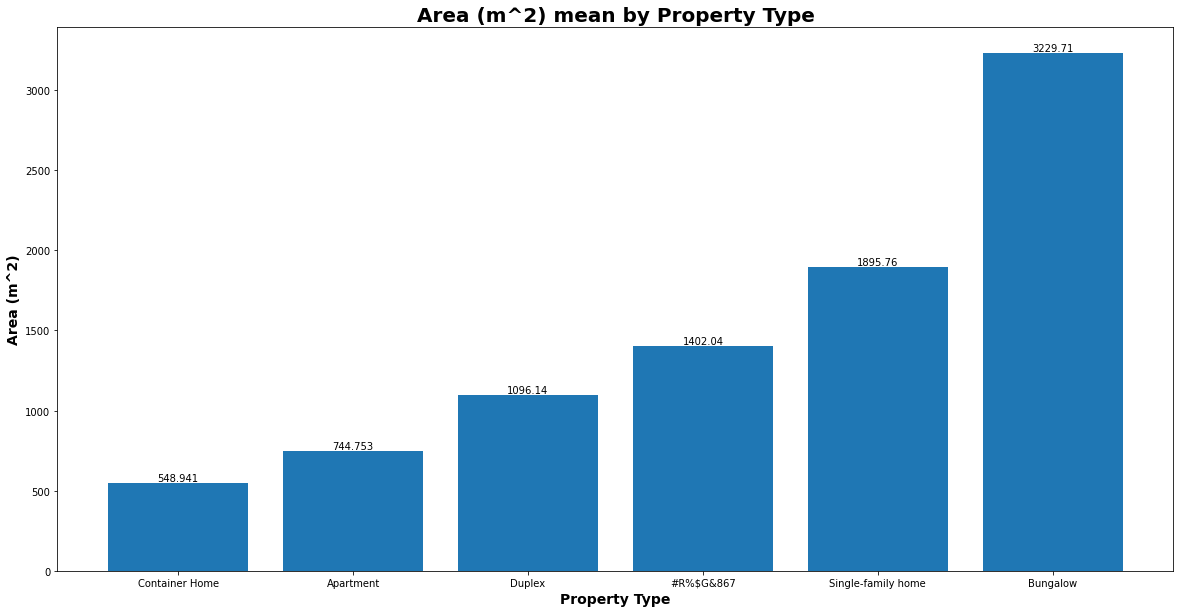

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
bars = ax.bar(df_groupby_property_type.sort_values(by='Property_Area')['Property_Type'], df_groupby_property_type.sort_values(by='Property_Area')['Property_Area'])
ax.bar_label(bars)
plt.xlabel("Property Type", fontdict={'size':14, 'weight':'bold'})
plt.ylabel("Area (m^2)", fontdict={'size':14, 'weight':'bold'})
plt.title('Area (m^2) mean by Property Type', fontdict={'size':20, 'weight':'bold'})

### 7. Apakah terdapat hubungan antara Neighborhood_Review dan Frequency_of_Powercuts

In [ ]:
df['Frequency_of_Powercuts'].value_counts()

0.0    24471
1.0    10010
2.0     2441
3.0     1194
Name: Frequency_of_Powercuts, dtype: int64

In [ ]:
df_groupby_frequency_of_powercuts = df.groupby('Frequency_of_Powercuts').mean().reset_index()
df_groupby_frequency_of_powercuts

,Frequency_of_Powercuts,Property_Area,Number_of_Windows,Number_of_Doors,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review
0,0.0,1404.808304,3.933404,2.332843,6.357972,121.722161,4.040955
1,1.0,1377.615485,3.901338,2.332168,6.359451,121.118482,3.409860
2,2.0,1385.505940,3.939652,2.349037,6.328628,121.066366,2.777456
3,3.0,1389.608878,3.913386,2.305695,6.332303,117.458961,2.180561


Text(0.5, 1.0, 'Neighborhood review mean by Frequency of Powercuts per week')

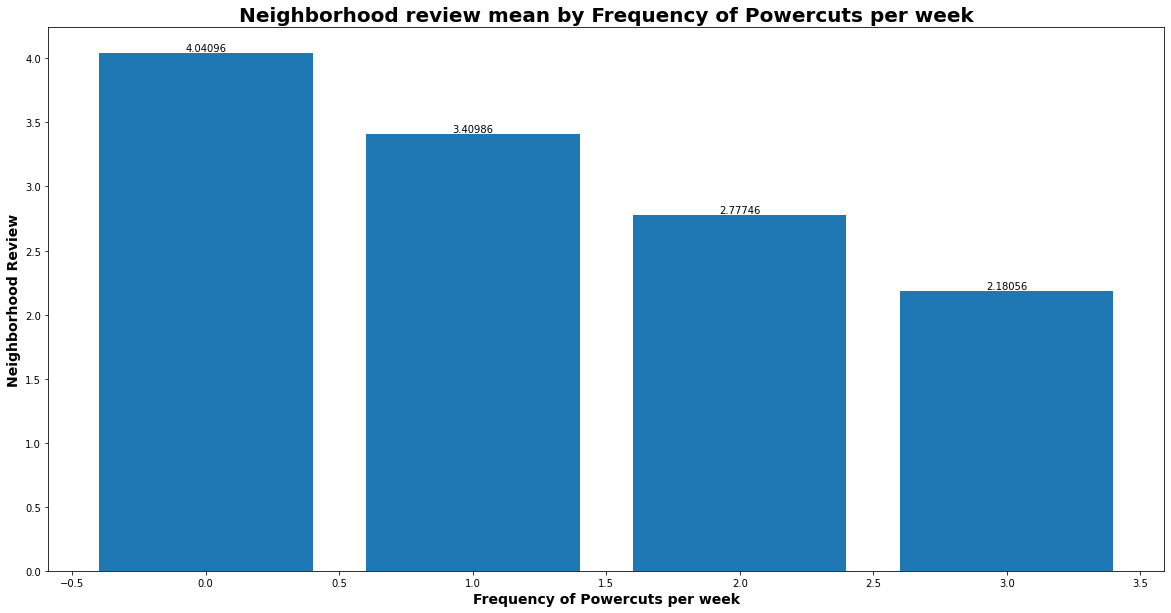

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
bars = ax.bar(df_groupby_frequency_of_powercuts.sort_values(by='Frequency_of_Powercuts')['Frequency_of_Powercuts'], df_groupby_frequency_of_powercuts.sort_values(by='Frequency_of_Powercuts')['Neighborhood_Review'])
ax.bar_label(bars)
plt.xlabel("Frequency of Powercuts per week", fontdict={'size':14, 'weight':'bold'})
plt.ylabel("Neighborhood Review", fontdict={'size':14, 'weight':'bold'})
plt.title('Neighborhood review mean by Frequency of Powercuts per week', fontdict={'size':20, 'weight':'bold'})

# General Preprocessing

## Handle Missing Value

In [ ]:
df['Property_Type'].replace({'#R%$G&867': np.NaN}, inplace=True)
df['Power_Backup'].replace({'NOT MENTIONED': np.NaN}, inplace=True)
df['Water_Supply'].replace({'NOT MENTIONED': np.NaN}, inplace=True)

In [ ]:
def cek_missing_values(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] > 0]
    
cek_missing_values(df)

,Total,Percent
Number_of_Windows,1654,0.041874
Frequency_of_Powercuts,1383,0.035014
Dust_and_Noise,1219,0.030862
Furnishing,1042,0.026380
Power_Backup,828,0.020963
Crime_Rate,787,0.019925
Property_Type,510,0.012912
Water_Supply,345,0.008734


In [ ]:
missing_row = df.isna().any(axis=1).sum()

print("Number of row with null value:", missing_row)

Number of row with null value: 7139


In [ ]:
df.shape

(39499, 14)

Karena 39499 - 7139 = 32360. Jumlah row tersebut masih cukup banyak sebagai data masukan. Dengan demikian, kami memutuskan untuk melakukan drop pada missing value

In [ ]:
df.dropna(inplace=True)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
missing_row = df.isna().any(axis=1).sum()

print("Number of row with null value:", missing_row)

Number of row with null value: 0


## Handle Duplicate

In [ ]:
print('Jumlah duplikasi pada data adalah', df.duplicated(keep=False).sum())

Jumlah duplikasi pada data adalah 0


## Handle Categorical

In [ ]:
furnishing = {"Unfurnished" : 0, "Semi_Furnished" : 1, "Fully Furnished": 2}
Crime_Rate = {"Well below average" : 0, "Slightly below average" : 1, "Slightly above average" : 2, "Well above average" : 3}
Dust_and_Noise = {"Low" : 0, "Medium" : 1, "High" : 2}
Habitability_category = {"Low" : 0, "Middle" : 1, "High" : 2}

In [ ]:
df_ordinal = df.copy(deep=True)

df['Furnishing'].replace(furnishing, inplace=True)
df['Crime_Rate'].replace(Crime_Rate,inplace=True)
df['Dust_and_Noise'].replace(Dust_and_Noise,inplace=True)
df['Habitability_category'].replace(Habitability_category,inplace=True)

In [ ]:
df = pd.get_dummies(df, drop_first=True)

# Modelling

## Classification

### Data Splitting

In [ ]:
X = df.drop('Habitability_category', axis=1)
y = df.Habitability_category

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

### Data Scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

### Data Balancing

Text(0.5, 1.0, 'Before Oversampling')

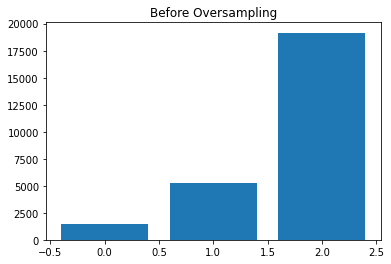

In [ ]:
counter = Counter(y_train)
plt.bar(counter.keys(), counter.values())
plt.title('Before Oversampling')

In [ ]:
svm_smote = SVMSMOTE()
X_train, y_train = svm_smote.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'After Oversampling')

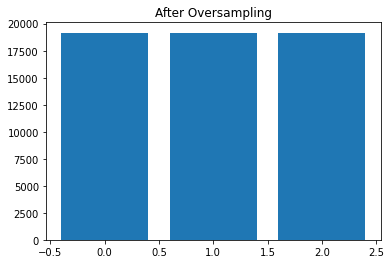

In [ ]:
counter = Counter(y_train)
plt.bar(counter.keys(), counter.values())
plt.title('After Oversampling')

### Model Selection

In [ ]:
def evaluate_classification(X, y, model):
 cv = StratifiedKFold(n_splits=10)
 scores = cross_val_score(model, X, y, scoring='f1_macro', cv=cv)
 return scores

In [ ]:
model = RandomForestClassifier(max_features=None)
scores = evaluate_classification(X_train, y_train, model)
print('F1 Score Mean and Standard Variance: %.3f (%.3f)' % (mean(scores), std(scores)))

F1 Score Mean and Standard Variance: 0.919 (0.030)


In [ ]:
model = LogisticRegression(solver='saga', penalty='l1', max_iter=1000)
scores = evaluate_classification(X_train, y_train, model)
print('F1 Score Mean and Standard Variance: %.3f (%.3f)' % (mean(scores), std(scores)))

F1 Score Mean and Standard Variance: 0.828 (0.024)


In [ ]:
model = SVC()
scores = evaluate_classification(X_train, y_train, model)
print('F1 Score Mean and Standard Variance: %.3f (%.3f)' % (mean(scores), std(scores)))

F1 Score Mean and Standard Variance: 0.849 (0.031)


### Model Evaluation

In [ ]:
def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [ ]:
model = RandomForestClassifier(max_features=None)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
evaluate_classifier_performance(prediction, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       369
           1       0.58      0.63      0.61      1312
           2       0.92      0.89      0.90      4791

    accuracy                           0.83      6472
   macro avg       0.75      0.78      0.76      6472
weighted avg       0.84      0.83      0.84      6472



Confusion Matrix



prediction,0,1,2
actual,,,
0,303,66,0
1,108,828,376
2,0,531,4260




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.7619173628439878
F1 Micro Average: 0.832972805933251
Precision Macro Average: 0.7457248362020282
Precision Micro Average: 0.832972805933251
Recall Macro Average: 0.7804676536120402
Recall Micro Average: 0.832972805933251



In [ ]:
model = LogisticRegression(solver='saga', penalty='l1', max_iter=1000)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
evaluate_classifier_performance(prediction, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.71      0.94      0.81       369
           1       0.52      0.75      0.61      1312
           2       0.95      0.82      0.88      4791

    accuracy                           0.81      6472
   macro avg       0.73      0.83      0.77      6472
weighted avg       0.85      0.81      0.82      6472



Confusion Matrix



prediction,0,1,2
actual,,,
0,346,23,0
1,139,982,191
2,1,878,3912




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.767920462042702
F1 Micro Average: 0.8096415327564895
Precision Macro Average: 0.728963694666683
Precision Micro Average: 0.8096415327564895
Recall Macro Average: 0.8342253273555486
Recall Micro Average: 0.8096415327564895



In [ ]:
model = SVC()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
evaluate_classifier_performance(prediction, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.70      0.90      0.79       369
           1       0.54      0.68      0.60      1312
           2       0.93      0.85      0.89      4791

    accuracy                           0.82      6472
   macro avg       0.73      0.81      0.76      6472
weighted avg       0.84      0.82      0.83      6472



Confusion Matrix



prediction,0,1,2
actual,,,
0,333,36,0
1,137,888,287
2,5,714,4072




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.7603960230600594
F1 Micro Average: 0.8178306551297899
Precision Macro Average: 0.7257787948438871
Precision Micro Average: 0.8178306551297899
Recall Macro Average: 0.8097317463468937
Recall Micro Average: 0.8178306551297899



### Conclusion

Berdasarkan evaluasi yang telah dilakukan, kami memilih **logistic regression** sebagai model klasifikasi yang paling sesuai untuk data ini dengan memberikan asumsi setiap label memiliki tingkat urgensi yang sama. Hal ini dikarenakan logistic regression memiliki variansi paling rendah pada f1-score setiap label kelas, yaitu **0.019633**.

## Regression

### Data Splitting

In [ ]:
X = df.drop('Neighborhood_Review', axis=1)
y = df.Neighborhood_Review

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Model Selection

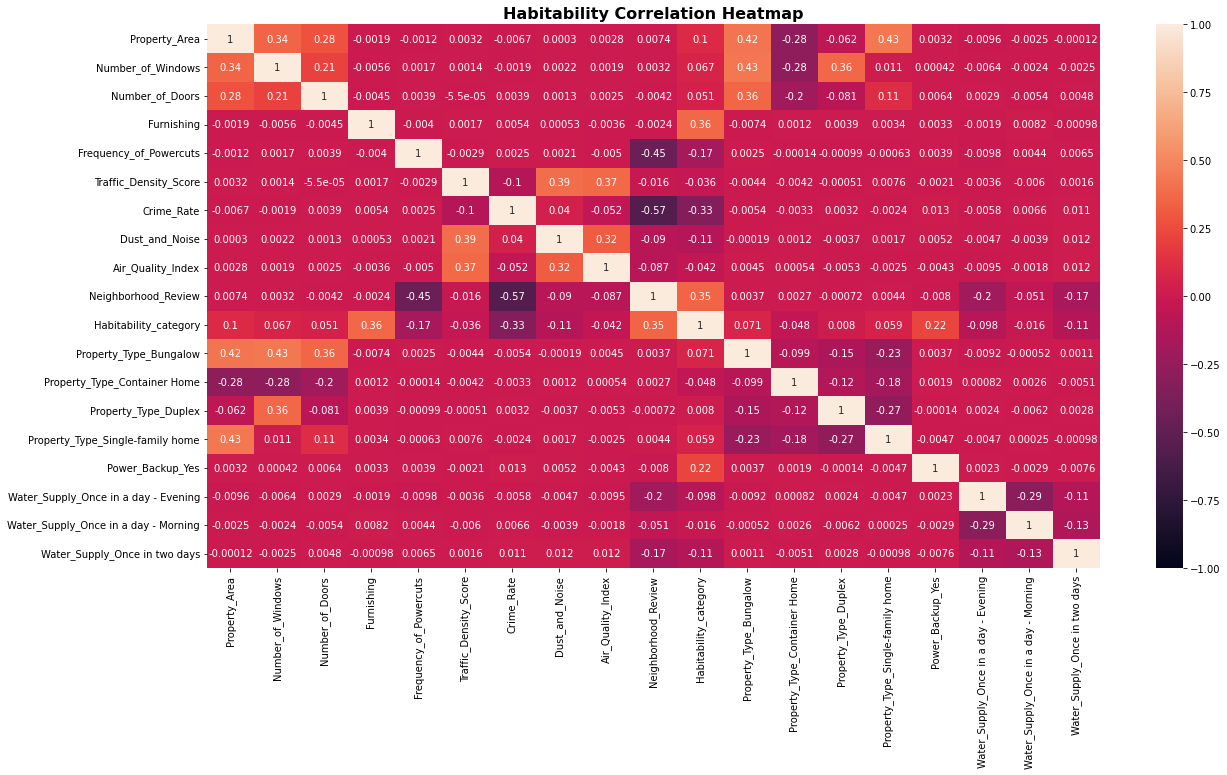

In [ ]:
plt.figure(figsize=(20,10))
heatmap=sns.heatmap(df.corr(method='kendall'), vmin=-1, vmax=1, annot=True)
plt.title('Habitability Correlation Heatmap', fontdict={'size':16, 'weight':'bold'})
plt.show()

In [ ]:
def evaluate_classification(X, y, model): 
 cv = KFold(n_splits = 5)
 scores = cross_val_score(model, X, y, scoring='r2', cv=cv)
 return scores

In [ ]:
model = LinearRegression()
scores = evaluate_classification(X_train, y_train, model)
print('R Square Mean and Standard Variance: %.3f (%.3f)' % (mean(scores), std(scores)))

R Square Mean and Standard Variance: 0.999 (0.000)


### Model Evaluation

In [ ]:
def metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
metrics(model.predict(X_test), y_test)

MAE: 0.021529759136287602
MSE: 0.000810364323871086
RMSE: 0.02846689873995912
R_squared: 0.998740539765254


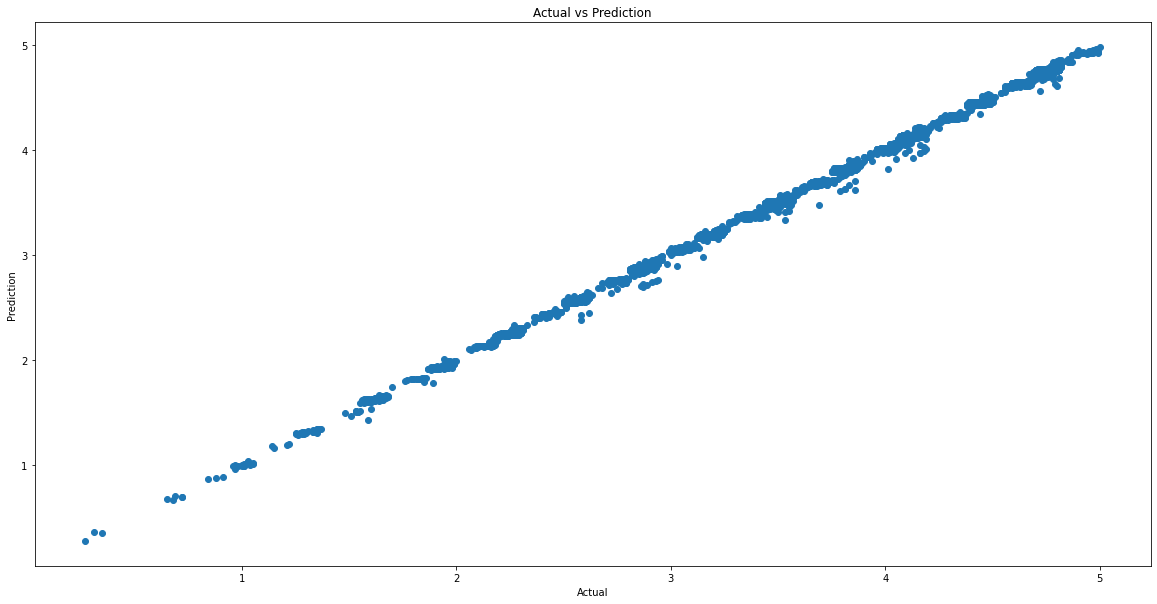

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(y_test, model.predict(X_test))
plt.title("Actual vs Prediction")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()

### Conclusion

Meskipun tidak memiliki fitur dengan korelasi yang sangat tinggi terhadap label, model berhasil memprediksi dengan sangat baik. Bahkan, berhasil mencapai nilai r square 0.99 pada data training dan testing.

## Clustering

### Choose Continous Feature

In [ ]:
list_of_cont = []
for i in df.columns:
  if len(df[i].value_counts()) > 20:
    list_of_cont.append(i)
list_of_cont

['Property_Area',
 'Traffic_Density_Score',
 'Air_Quality_Index',
 'Neighborhood_Review']

### Data Scaling

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, index = df.index, columns = df.columns)

### Find Cluster Number

In [ ]:
nums = []
scores = []
score = -1
num = 2

for i in range(2,7):
  KMean= KMeans(n_clusters=i)
  KMean.fit(df_scaled[list_of_cont])
  label=KMean.predict(df_scaled[list_of_cont])
  silhoutte_score = silhouette_score(df_scaled[list_of_cont], label)
  nums.append(i)
  scores.append(silhoutte_score)
  if silhoutte_score > score:
    score = silhoutte_score
    num = i
print(f"Skor Silhoutte terbaik didapat dengan skor {score} dengan {num} kluster")

Skor Silhoutte terbaik didapat dengan skor 0.3090966005112977 dengan 5 kluster


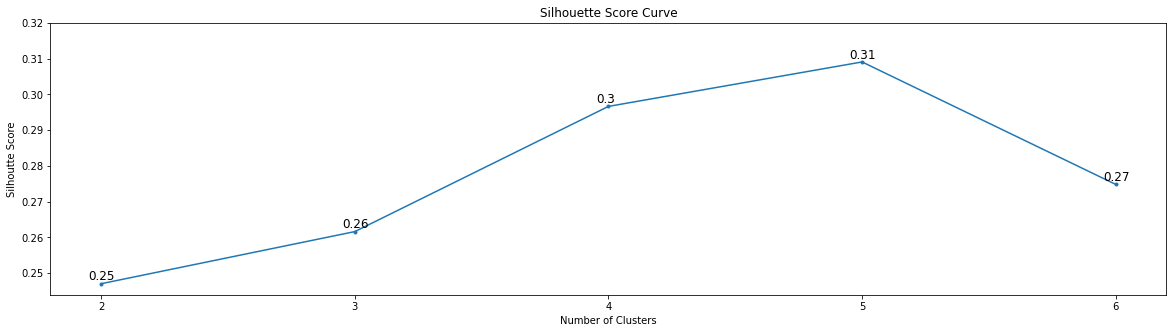

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
plt.plot(nums, scores, marker='.')
plt.title('Silhouette Score Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Score')
plt.xticks(ticks=nums)
plt.yticks(ticks=[0.25, 0.26, 0.27, 0.28, 0.29, 0.30, 0.31, 0.32])
for index in range(len(nums)):
  ax.text(nums[index]-0.05, scores[index]+0.001, round(scores[index], 2), size=12)
plt.show()

### Fitting

In [ ]:
KMean= KMeans(n_clusters=5)
KMean.fit(df_scaled[list_of_cont])
label=KMean.predict(df_scaled[list_of_cont])

### Visualization Using PCA

In [ ]:
pca = PCA()
pca.fit(df_scaled[list_of_cont])
trans_pca = pca.transform(df_scaled[list_of_cont])
explained_variants = pca.explained_variance_ratio_
explained_variants

array([0.32671896, 0.25251671, 0.24681705, 0.17394728])

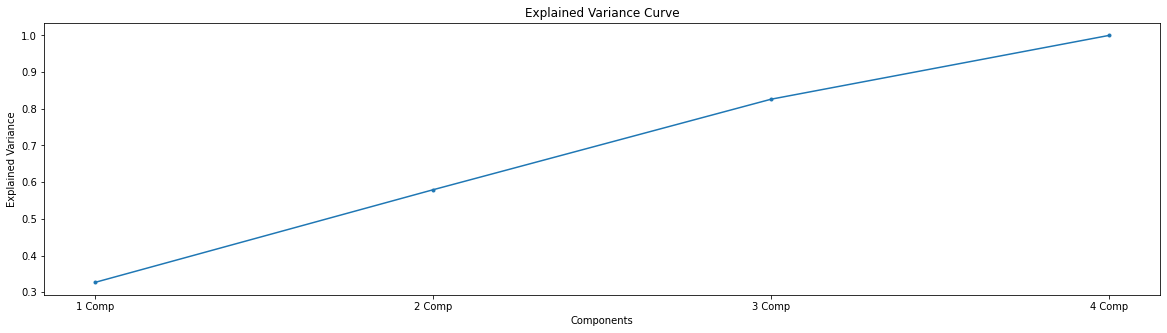

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
plt.plot(['1 Comp', '2 Comp', '3 Comp', '4 Comp'], np.cumsum(explained_variants), marker='.')
plt.title('Explained Variance Curve')
plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.xticks(ticks=['1 Comp', '2 Comp', '3 Comp', '4 Comp'])
plt.show()

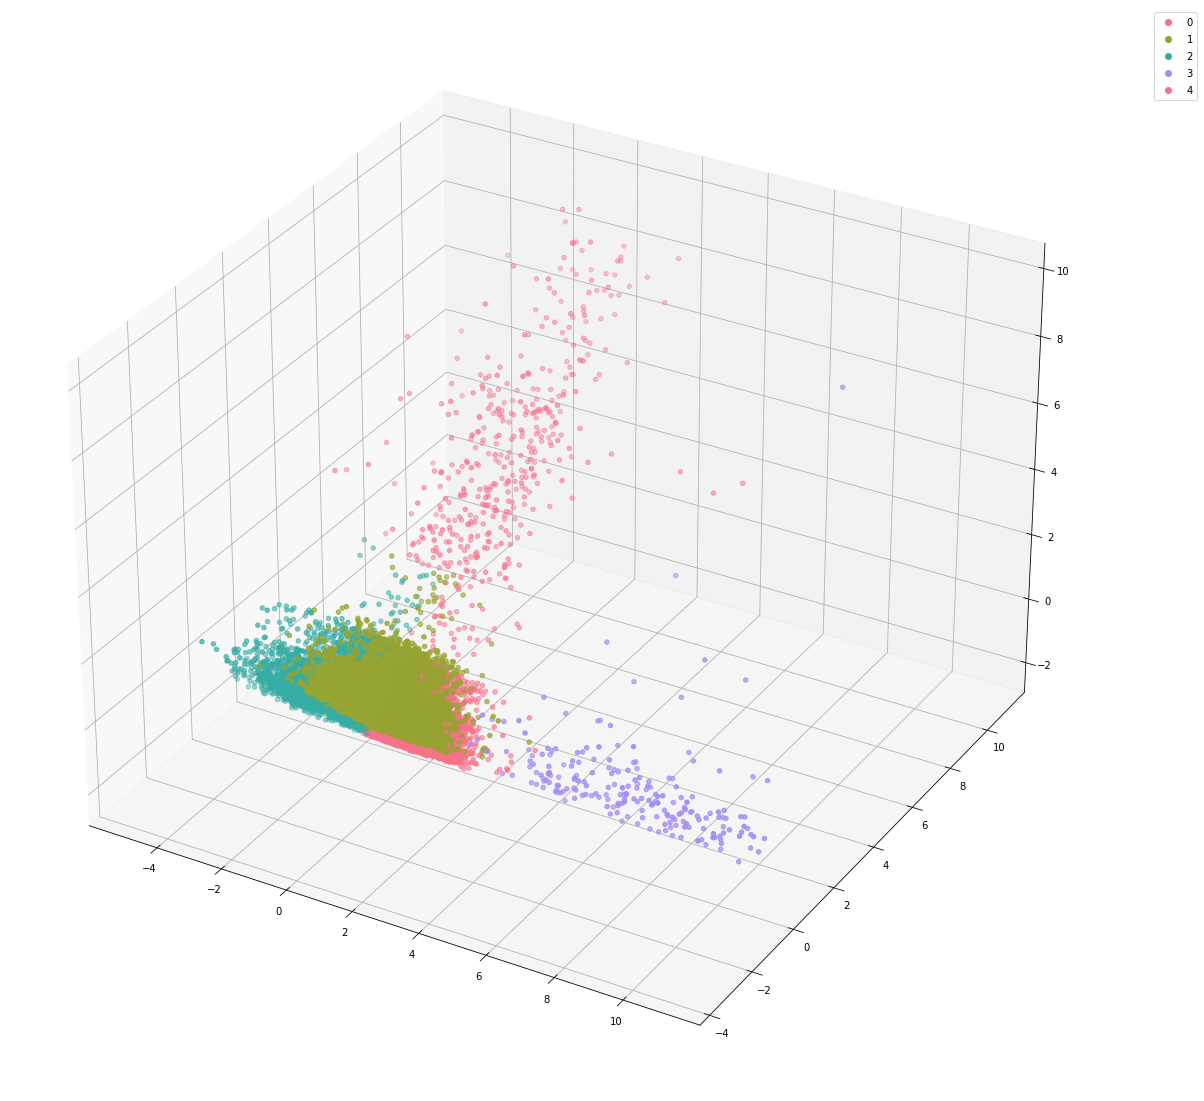

In [ ]:
trans_pca_viz = np.transpose(trans_pca)
plt.figure(figsize = (20, 20))
plot_axes = plt.axes(projection = '3d')
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
sc = plot_axes.scatter3D(trans_pca_viz[0], trans_pca_viz[1], trans_pca_viz[2], c=label, cmap=cmap)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

### Cluster Interpretation

In [ ]:
df_ordinal['cluster'] = label
df_ordinal.head()

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_category,cluster
0,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,High,2
1,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,High,0
2,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,Low,1
3,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,High,0
4,Single-family home,1185,3.0,3,Unfurnished,0.0,No,Once in a day - Morning,5.69,Well below average,Medium,91.0,4.49,High,2


In [ ]:
data = {'cluster' : df_ordinal['cluster'].value_counts().index.tolist(),
        'n' : df_ordinal['cluster'].value_counts().tolist()}
pd.DataFrame(data)

,cluster,n
0,0,12801
1,2,9942
2,1,9012
3,4,398
4,3,207


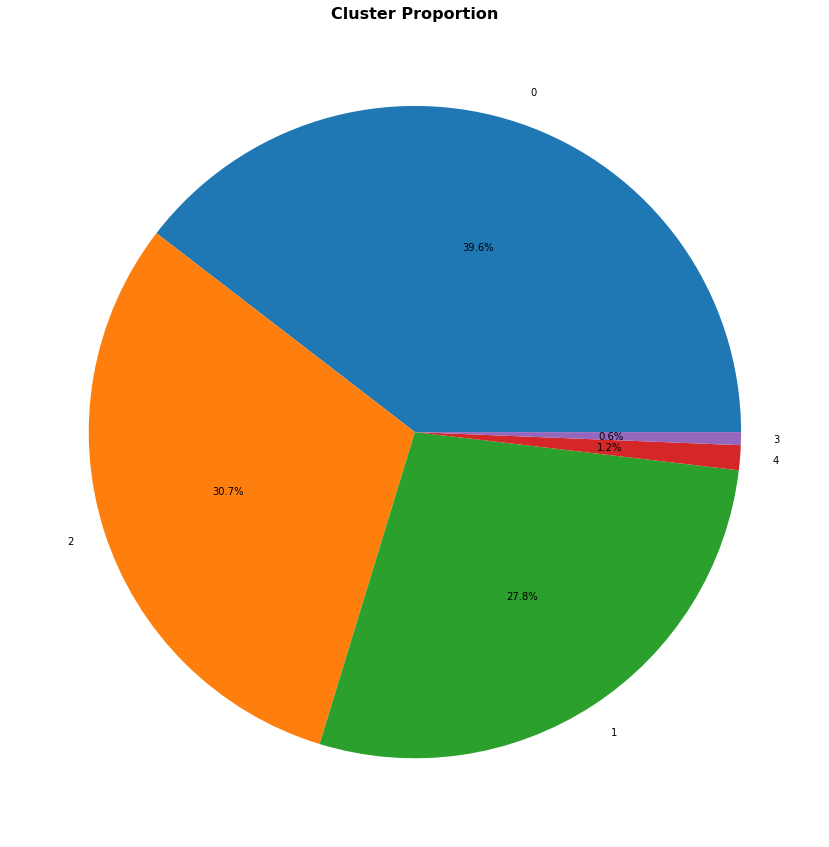

In [ ]:
data = df_ordinal['cluster'].value_counts()

plt.figure(figsize=(15,15))
plt.pie(data.tolist(), labels = data.index.tolist(), autopct='%.1f%%')
plt.title('Cluster Proportion', fontdict={'size':16, 'weight':'bold'})
plt.show()

In [ ]:
cluster = {0 : "0", 1 : "1", 2 : "2", 3: "3", 4: "4"}
df_ordinal['cluster'].replace(cluster, inplace=True)

In [ ]:
df_ordinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32360 entries, 0 to 32359
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_Type           32360 non-null  object 
 1   Property_Area           32360 non-null  int64  
 2   Number_of_Windows       32360 non-null  float64
 3   Number_of_Doors         32360 non-null  int64  
 4   Furnishing              32360 non-null  object 
 5   Frequency_of_Powercuts  32360 non-null  float64
 6   Power_Backup            32360 non-null  object 
 7   Water_Supply            32360 non-null  object 
 8   Traffic_Density_Score   32360 non-null  float64
 9   Crime_Rate              32360 non-null  object 
 10  Dust_and_Noise          32360 non-null  object 
 11  Air_Quality_Index       32360 non-null  float64
 12  Neighborhood_Review     32360 non-null  float64
 13  Habitability_category   32360 non-null  object 
 14  cluster                 32360 non-null

In [ ]:
df_groupby_cluster = df_ordinal.groupby('cluster').mean().reset_index()

In [ ]:
def numeric_visualization_by_cluster(column):
  data = df_groupby_cluster.sort_values(by=column)
  fig, ax = plt.subplots(figsize=(20,10))
  bars = ax.bar(data['cluster'], data[column])
  ax.bar_label(bars)
  plt.xlabel("Cluster", fontdict={'size':14, 'weight':'bold'})
  plt.ylabel(column.replace("_", " "), fontdict={'size':14, 'weight':'bold'})
  plt.title(f'{column.replace("_", " ")} Mean by Cluster', fontdict={'size':20, 'weight':'bold'})

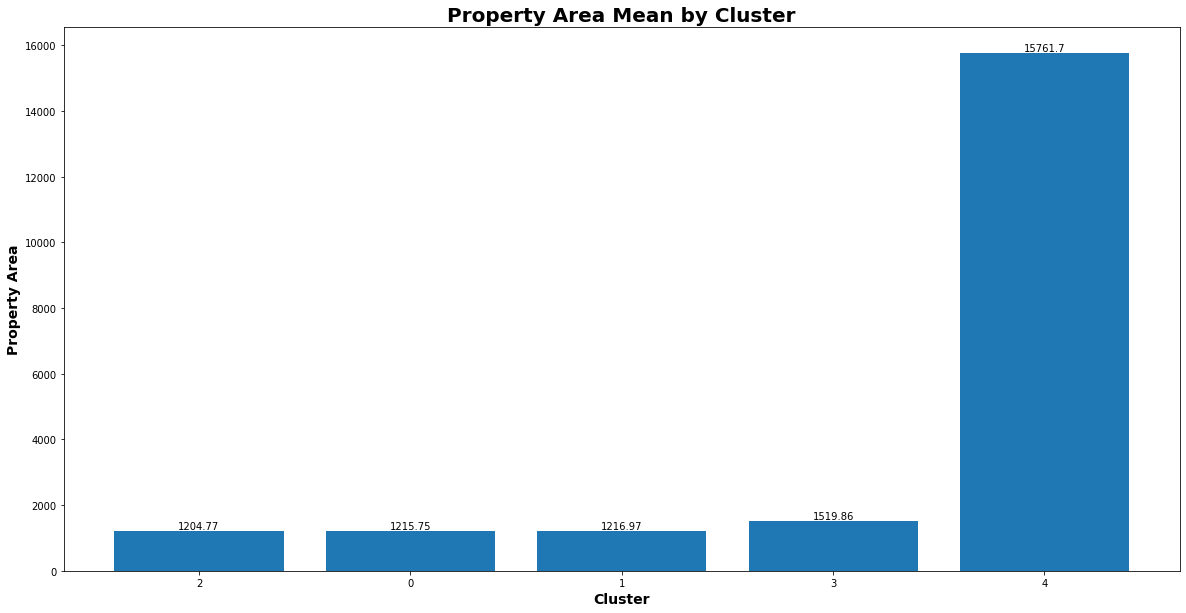

In [ ]:
numeric_visualization_by_cluster('Property_Area')

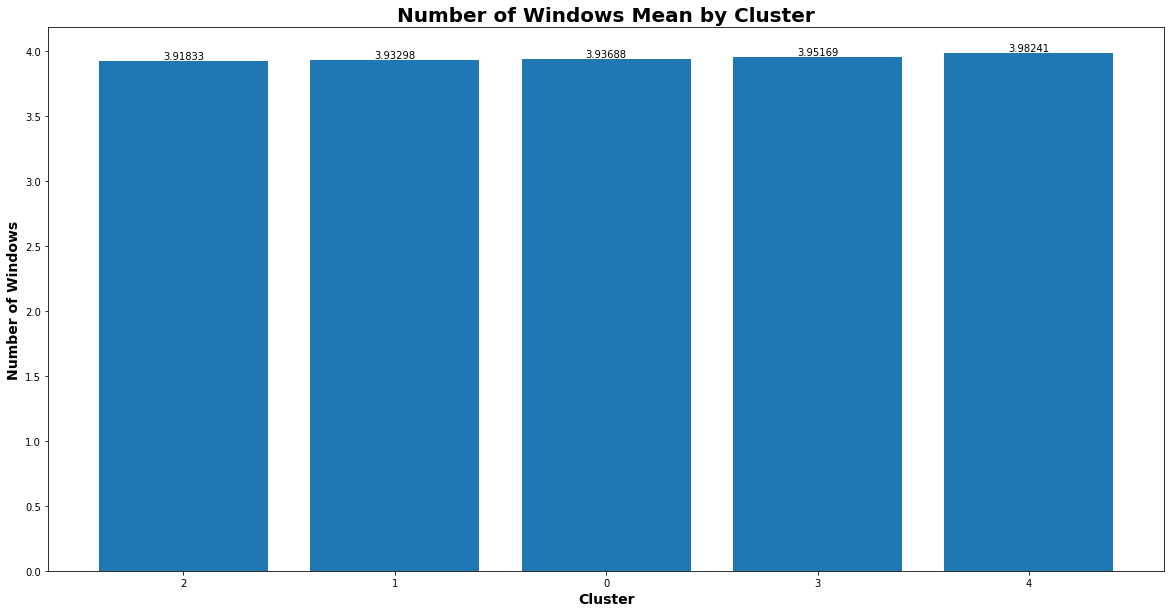

In [ ]:
numeric_visualization_by_cluster('Number_of_Windows')

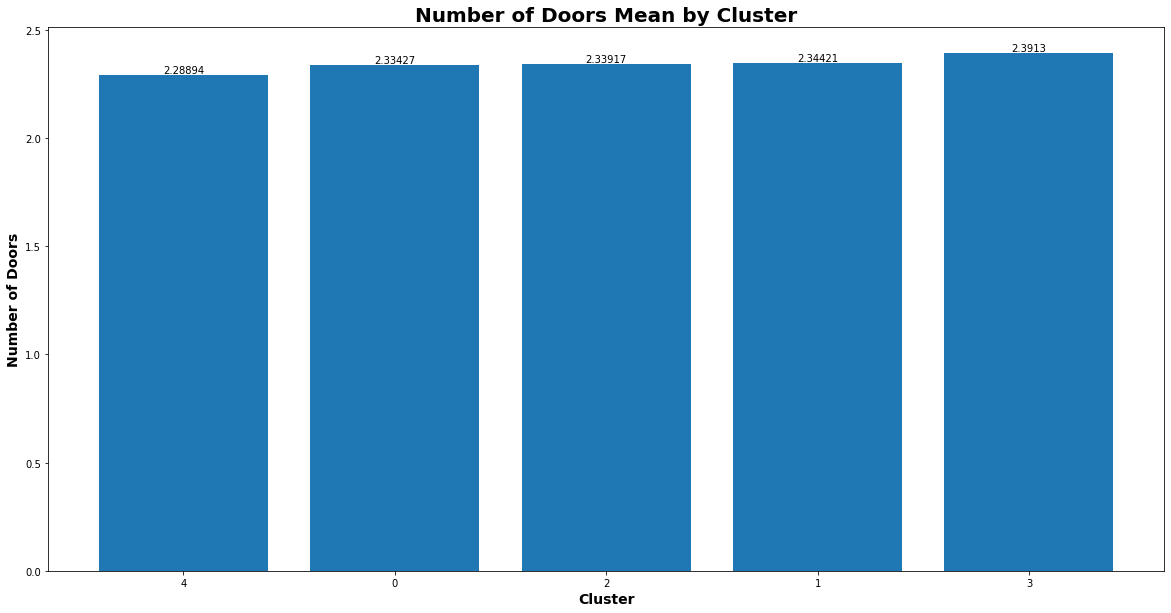

In [ ]:
numeric_visualization_by_cluster('Number_of_Doors')

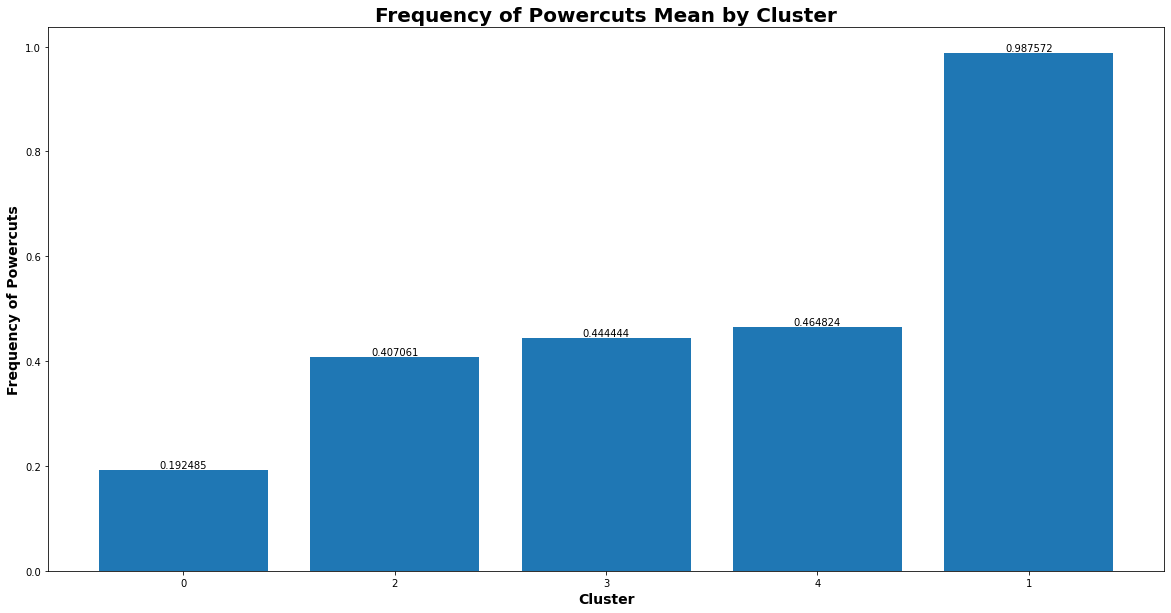

In [ ]:
numeric_visualization_by_cluster('Frequency_of_Powercuts')

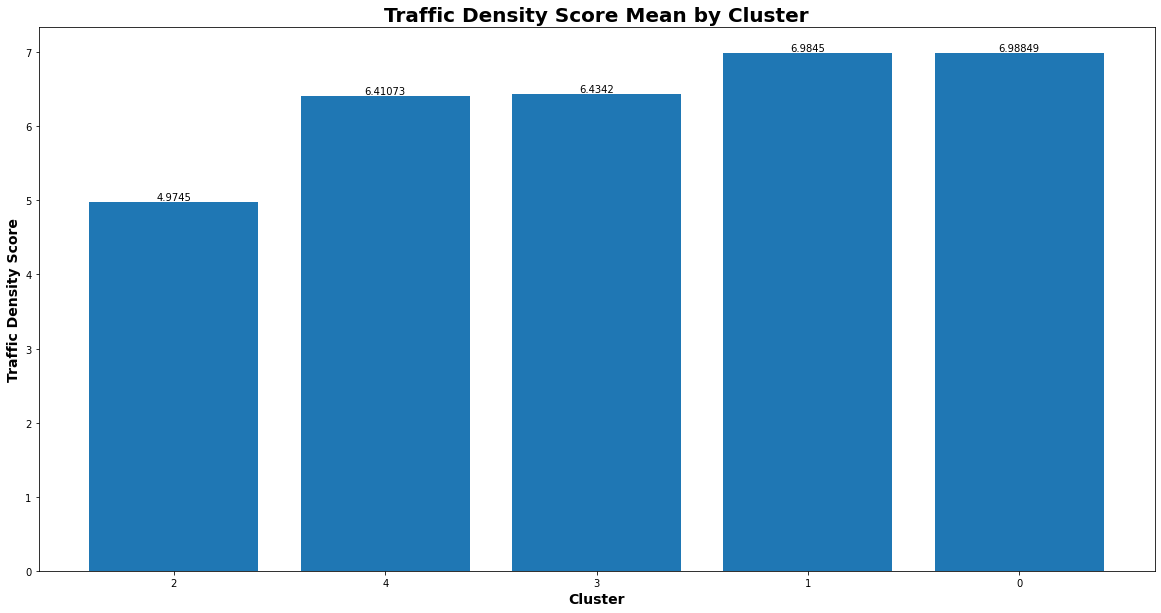

In [ ]:
numeric_visualization_by_cluster('Traffic_Density_Score')

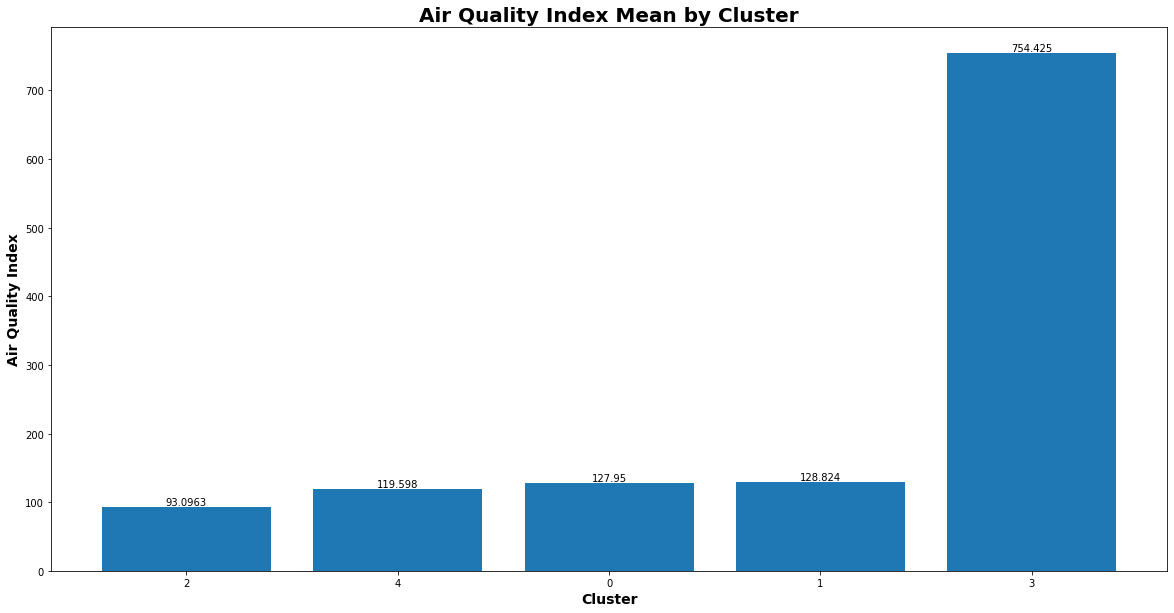

In [ ]:
numeric_visualization_by_cluster('Air_Quality_Index')

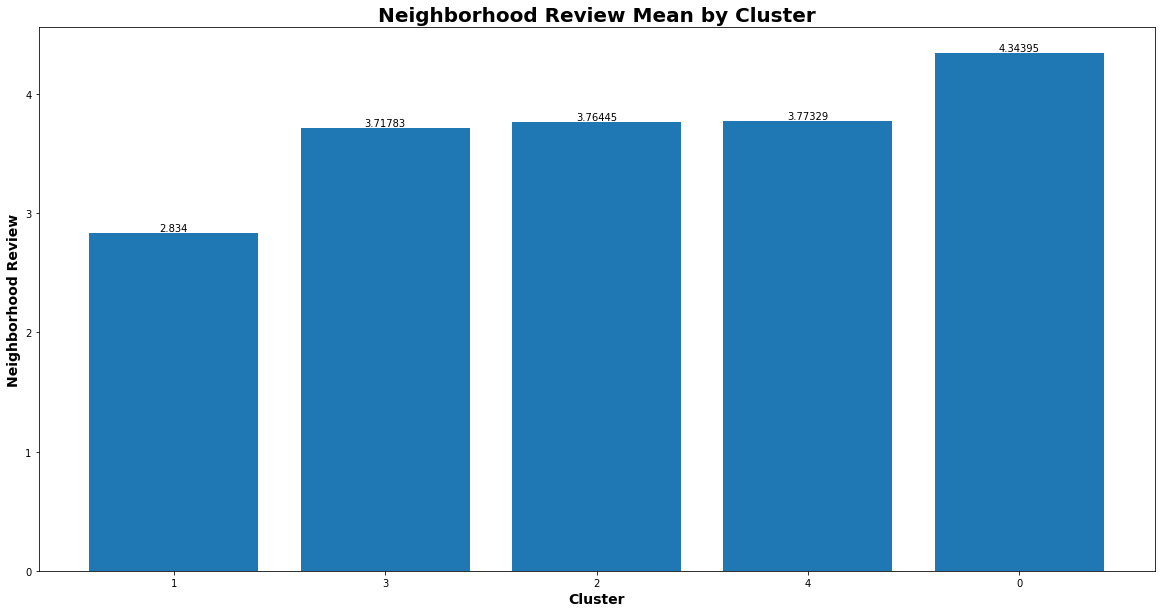

In [ ]:
numeric_visualization_by_cluster('Neighborhood_Review')

In [ ]:
df_ordinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32360 entries, 0 to 32359
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_Type           32360 non-null  object 
 1   Property_Area           32360 non-null  int64  
 2   Number_of_Windows       32360 non-null  float64
 3   Number_of_Doors         32360 non-null  int64  
 4   Furnishing              32360 non-null  object 
 5   Frequency_of_Powercuts  32360 non-null  float64
 6   Power_Backup            32360 non-null  object 
 7   Water_Supply            32360 non-null  object 
 8   Traffic_Density_Score   32360 non-null  float64
 9   Crime_Rate              32360 non-null  object 
 10  Dust_and_Noise          32360 non-null  object 
 11  Air_Quality_Index       32360 non-null  float64
 12  Neighborhood_Review     32360 non-null  float64
 13  Habitability_category   32360 non-null  object 
 14  cluster                 32360 non-null

In [ ]:
def visualize_countplot(column):
  fig, ax = plt.subplots(figsize=(20,10))
  sns.countplot(data=df_ordinal, x=column, hue = 'cluster')
  plt.show()

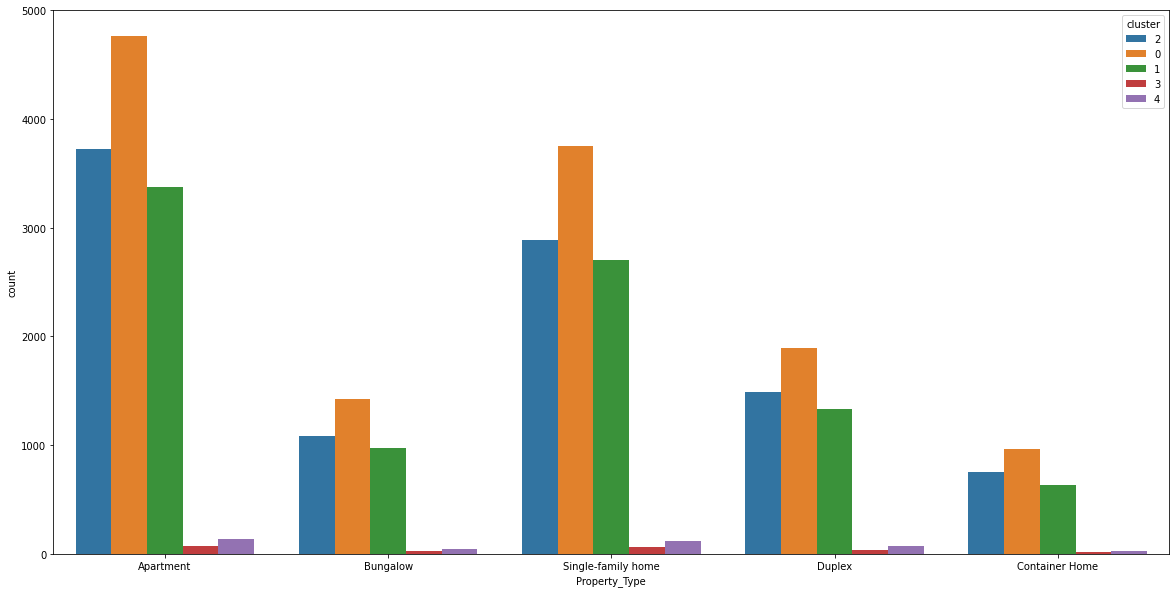

In [ ]:
visualize_countplot('Property_Type')

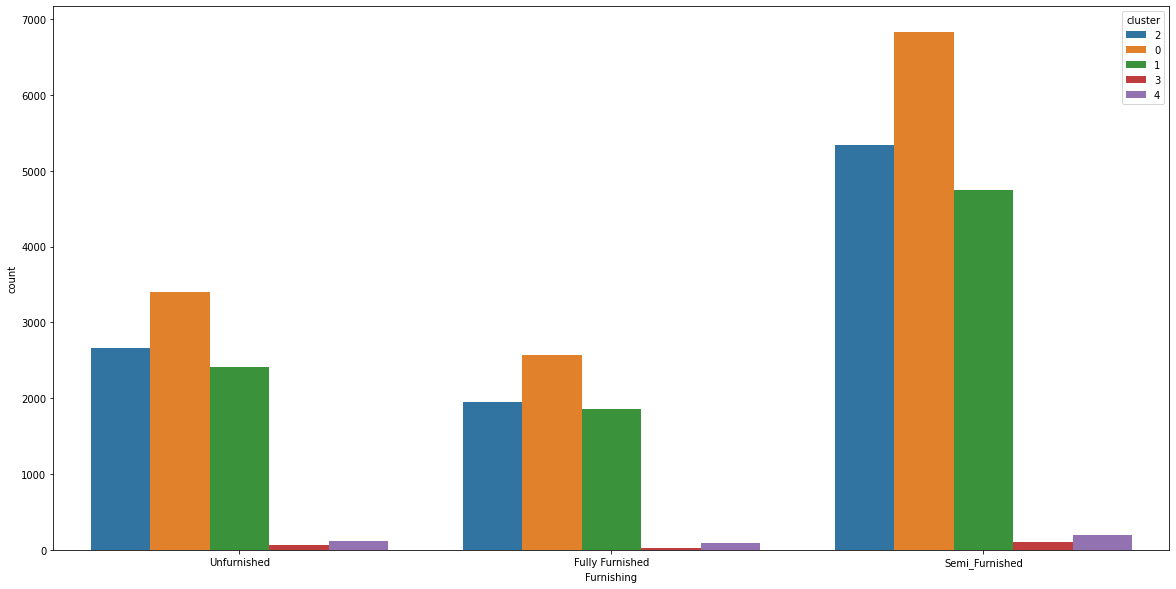

In [ ]:
visualize_countplot('Furnishing')

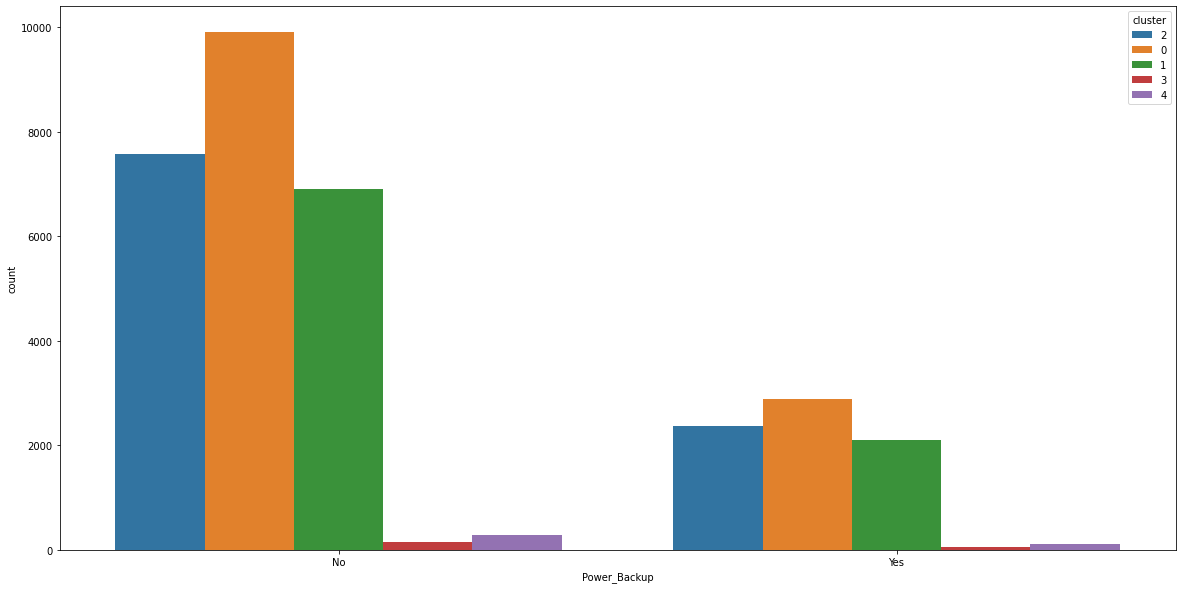

In [ ]:
visualize_countplot('Power_Backup')

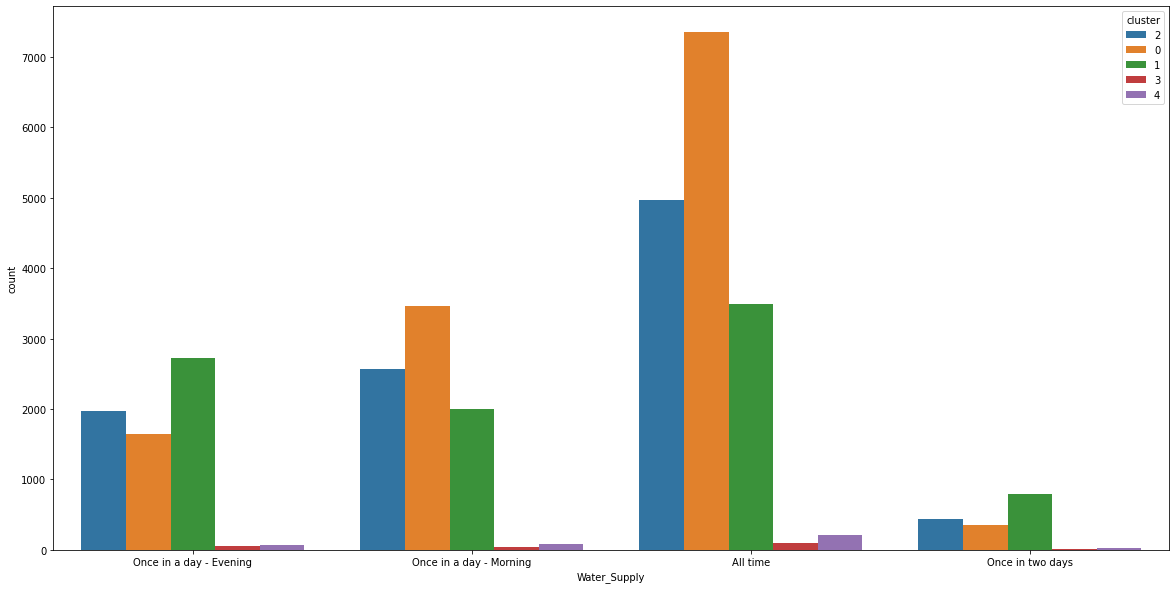

In [ ]:
visualize_countplot('Water_Supply')

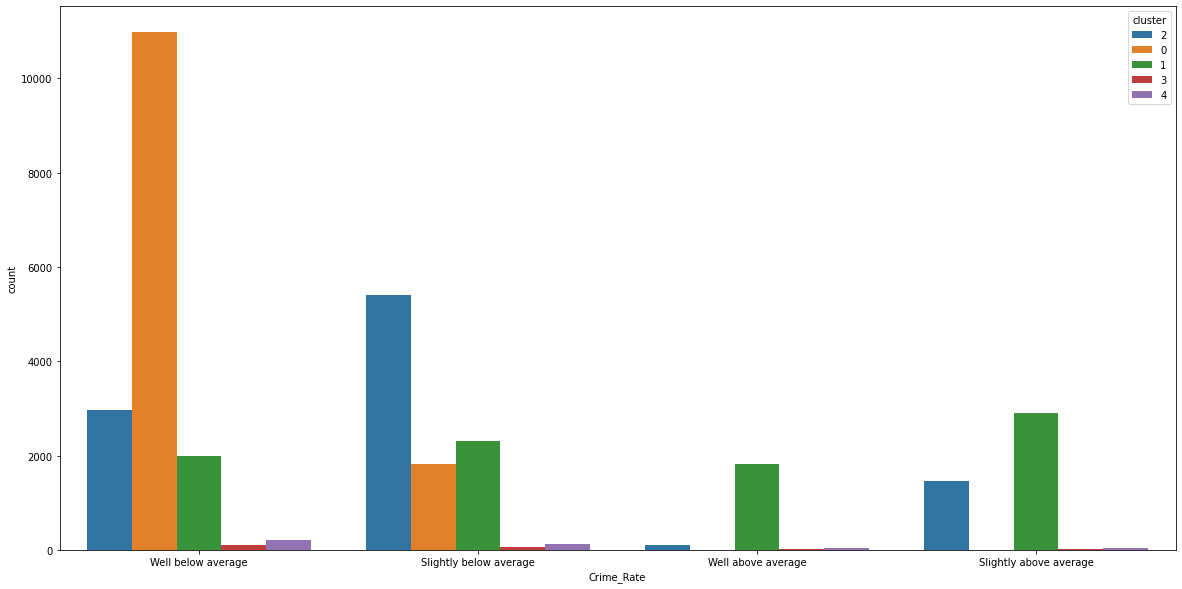

In [ ]:
visualize_countplot('Crime_Rate')

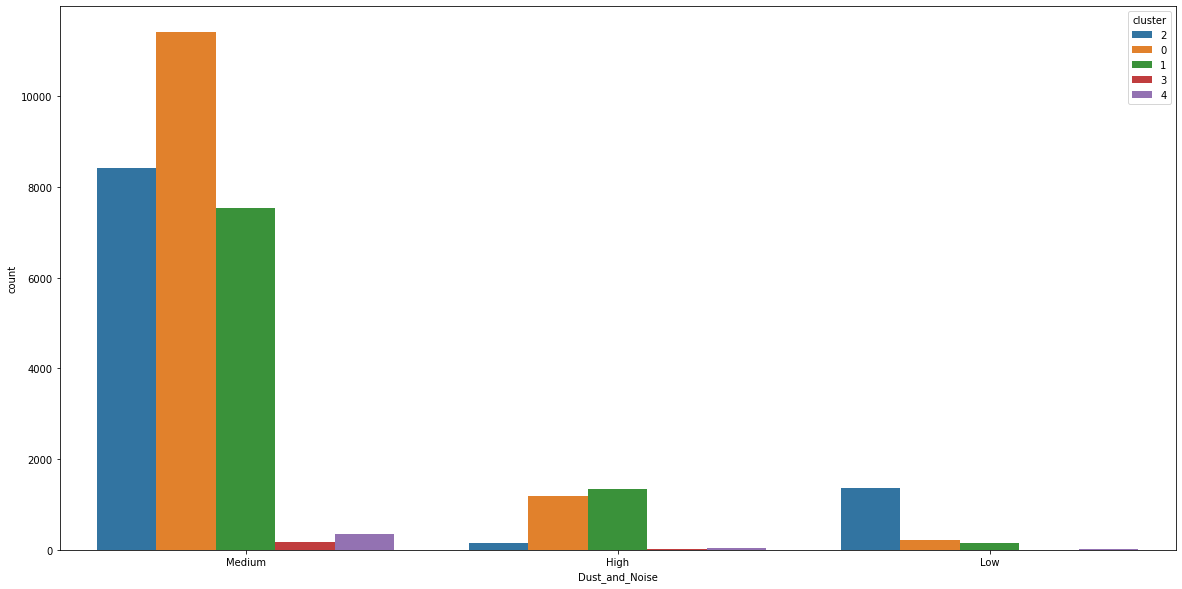

In [ ]:
visualize_countplot('Dust_and_Noise')

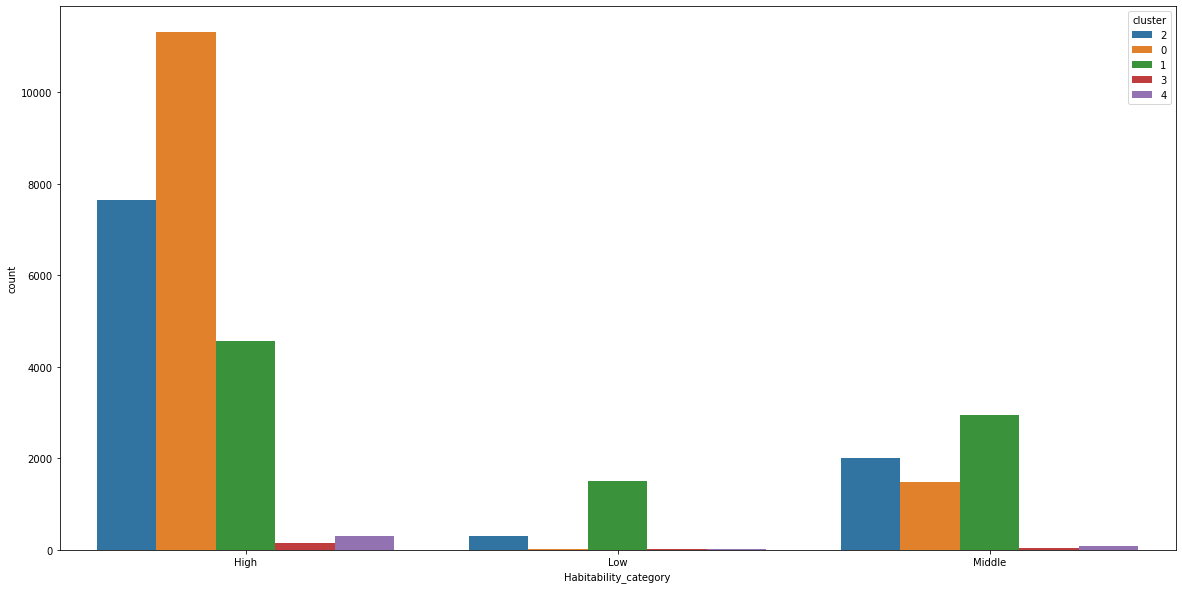

In [ ]:
visualize_countplot('Habitability_category')